In [367]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import seaborn as sns
import matplotlib.pyplot as plt
import json
#import os
import re
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [368]:
df = pd.read_excel('Data2.xlsx')

df.head()

Unnamed: 0                          Name  \
0           0               1.  Cloudflare    
1           1                   2.  GumGum    
2           2   3.  Authentic Brands Group    
3           3                4.  Hootsuite    
4           4                     5.  Tubi    

                                                Type  \
0   Ad Server, Advertising, Analytics, Enterprise...   
1   Advertising, Advertising Platforms, Analytics...   
2    Advertising, Brand Marketing, Marketing, Retail   
3   Advertising, Apps, Brand Marketing, Messaging...   
4   Advertising, Digital Entertainment, Film, Med...   

                                 Headquaters  Status  Founded Year  \
0   San Francisco, California, United States  Active      Jun 2009   
1    Santa Monica, California, United States  Active          2008   
2          New York, New York, United States  Active          2010   
3        Vancouver, British Columbia, Canada  Active  Nov 28, 2008   
4   San Francisco, California, United States  Active          2014   

  Investment Stage     Exit Date     Purpose Number of Investment  ...  \
0            —\r\n  Sep 12, 2019  For Profit                    —  ...   
1            —\r\n             —  For Profit                    —  ...   
2            —\r\n             —  For Profit                    1  ...   
3            —\r\n             —  For Profit                    —  ...   
4            —\r\n             —  For Profit                    —  ...   

  Acquired Price Acquisitions      Acquisition Status Acquired By IPO status  \
0              —            5   Made Acquisitions\r\n           —     Public   
1              —            —                   —\r\n           —    Private   
2              —            9   Made Acquisitions\r\n           —    Private   
3              —           12   Made Acquisitions\r\n           —    Private   
4              —            —                   —\r\n           —    Private   

               Full Name                             Job Title  \
0       251.  Eran Shir                       Co-founder & CEO   
1       252.  Mitch Liu   Co-Founder & Chief Executive Officer   
2   253.  Amiad Solomon                  Chairman & Co-Founder   
3     254.  Erik Berlin                          CEO & Founder   
4     255.  Reese Jones                                      —   

  Primary Organization Founded Organization Portfolio Companies  
0               Nexar                     2                   1  
1           Sliver.tv                     4                   —  
2             Komoona                     6                   —  
3             Breaker                     2                   —  
4                    —                    4                   —  

[5 rows x 30 columns]

In [369]:
df = df.replace(to_replace ="—", 
                 value = np.nan) 
df =  df.replace(to_replace ="—\r\n", 
                 value = np.nan, regex=True)
df.head()

Unnamed: 0                          Name  \
0           0               1.  Cloudflare    
1           1                   2.  GumGum    
2           2   3.  Authentic Brands Group    
3           3                4.  Hootsuite    
4           4                     5.  Tubi    

                                                Type  \
0   Ad Server, Advertising, Analytics, Enterprise...   
1   Advertising, Advertising Platforms, Analytics...   
2    Advertising, Brand Marketing, Marketing, Retail   
3   Advertising, Apps, Brand Marketing, Messaging...   
4   Advertising, Digital Entertainment, Film, Med...   

                                 Headquaters  Status  Founded Year  \
0   San Francisco, California, United States  Active      Jun 2009   
1    Santa Monica, California, United States  Active          2008   
2          New York, New York, United States  Active          2010   
3        Vancouver, British Columbia, Canada  Active  Nov 28, 2008   
4   San Francisco, California, United States  Active          2014   

  Investment Stage     Exit Date     Purpose Number of Investment  ...  \
0              NaN  Sep 12, 2019  For Profit                  NaN  ...   
1              NaN           NaN  For Profit                  NaN  ...   
2              NaN           NaN  For Profit                    1  ...   
3              NaN           NaN  For Profit                  NaN  ...   
4              NaN           NaN  For Profit                  NaN  ...   

  Acquired Price Acquisitions      Acquisition Status Acquired By IPO status  \
0            NaN            5   Made Acquisitions\r\n         NaN     Public   
1            NaN          NaN                     NaN         NaN    Private   
2            NaN            9   Made Acquisitions\r\n         NaN    Private   
3            NaN           12   Made Acquisitions\r\n         NaN    Private   
4            NaN          NaN                     NaN         NaN    Private   

               Full Name                             Job Title  \
0       251.  Eran Shir                       Co-founder & CEO   
1       252.  Mitch Liu   Co-Founder & Chief Executive Officer   
2   253.  Amiad Solomon                  Chairman & Co-Founder   
3     254.  Erik Berlin                          CEO & Founder   
4     255.  Reese Jones                                    NaN   

  Primary Organization Founded Organization Portfolio Companies  
0               Nexar                     2                   1  
1           Sliver.tv                     4                 NaN  
2             Komoona                     6                 NaN  
3             Breaker                     2                 NaN  
4                  NaN                    4                 NaN  

[5 rows x 30 columns]

In [370]:
df['Acquisition Status']

0                      Made Acquisitions\r\n
1                                        NaN
2                      Made Acquisitions\r\n
3                      Made Acquisitions\r\n
4                                        NaN
                        ...                 
9995                        Was Acquired\r\n
9996                   Made Acquisitions\r\n
9997                   Made Acquisitions\r\n
9998                                     NaN
9999     Made Acquisitions, Was Acquired\r\n
Name: Acquisition Status, Length: 10000, dtype: object

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 10000 non-null  int64 
 1   Name                       10000 non-null  object
 2   Type                       10000 non-null  object
 3   Headquaters                10000 non-null  object
 4   Status                     10000 non-null  object
 5   Founded Year               9934 non-null   object
 6   Investment Stage           103 non-null    object
 7   Exit Date                  2088 non-null   object
 8   Purpose                    8147 non-null   object
 9   Number of Investment       817 non-null    object
 10  Number of Lead Investment  523 non-null    object
 11  Estimated Revenue          6255 non-null   object
 12  Founders                   8545 non-null   object
 13  Number of employees        9231 non-null   object
 14  Funding

In [372]:
df.isnull().sum()

Unnamed: 0                      0
Name                            0
Type                            0
Headquaters                     0
Status                          0
Founded Year                   66
Investment Stage             9897
Exit Date                    7912
Purpose                      1853
Number of Investment         9183
Number of Lead Investment    9477
Estimated Revenue            3745
Founders                     1455
Number of employees           769
Funding Rounds                616
Funding Status               2619
Active Products              2567
Funding Amount                696
Nunmber of Lead Investors    2774
Nmber of Investors           1428
Acquired Price               9564
Acquisitions                 7971
Acquisition Status           7110
Acquired By                  8666
IPO status                      0
Full Name                       0
Job Title                    1058
Primary Organization         1058
Founded Organization            0
Portfolio Comp

In [373]:
feature_with_nan = [features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtype == 'O']
print (len(feature_with_nan))
feature_with_nan

22


['Founded Year',
 'Investment Stage',
 'Exit Date',
 'Purpose',
 'Number of Investment',
 'Number of Lead Investment',
 'Estimated Revenue',
 'Founders',
 'Number of employees',
 'Funding Rounds',
 'Funding Status',
 'Active Products',
 'Funding Amount',
 'Nunmber of Lead Investors',
 'Nmber of Investors',
 'Acquired Price',
 'Acquisitions',
 'Acquisition Status',
 'Acquired By',
 'Job Title',
 'Primary Organization',
 'Portfolio Companies']

In [374]:
for features in feature_with_nan:
    print('{}: {}% missing value'.format(features, np.round(df[features].isnull().mean()*100,4)))

Founded Year: 0.66% missing value
Investment Stage: 98.97% missing value
Exit Date: 79.12% missing value
Purpose: 18.53% missing value
Number of Investment: 91.83% missing value
Number of Lead Investment: 94.77% missing value
Estimated Revenue: 37.45% missing value
Founders: 14.55% missing value
Number of employees: 7.69% missing value
Funding Rounds: 6.16% missing value
Funding Status: 26.19% missing value
Active Products: 25.67% missing value
Funding Amount: 6.96% missing value
Nunmber of Lead Investors: 27.74% missing value
Nmber of Investors: 14.28% missing value
Acquired Price: 95.64% missing value
Acquisitions: 79.71% missing value
Acquisition Status: 71.1% missing value
Acquired By: 86.66% missing value
Job Title: 10.58% missing value
Primary Organization: 10.58% missing value
Portfolio Companies: 68.55% missing value


# Data Cleaning

In [375]:
#numericals features
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']  
print('Number of numerical variables:', len(numerical_feature))  

Number of numerical variables: 2


In [376]:
#categorical feature
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']  
print('Number of categorical variables:', len(categorical_feature))  
categorical_feature

Number of categorical variables: 28


['Name',
 'Type',
 'Headquaters',
 'Status',
 'Founded Year',
 'Investment Stage',
 'Exit Date',
 'Purpose',
 'Number of Investment',
 'Number of Lead Investment',
 'Estimated Revenue',
 'Founders',
 'Number of employees',
 'Funding Rounds',
 'Funding Status',
 'Active Products',
 'Funding Amount',
 'Nunmber of Lead Investors',
 'Nmber of Investors',
 'Acquired Price',
 'Acquisitions',
 'Acquisition Status',
 'Acquired By',
 'IPO status',
 'Full Name',
 'Job Title',
 'Primary Organization',
 'Portfolio Companies']

In [377]:
#number of categories in each feature
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is Name and number of categories are 10000
The feature is Type and number of categories are 7679
The feature is Headquaters and number of categories are 1560
The feature is Status and number of categories are 2
The feature is Founded Year and number of categories are 1915
The feature is Investment Stage and number of categories are 38
The feature is Exit Date and number of categories are 1432
The feature is Purpose and number of categories are 3
The feature is Number of Investment and number of categories are 83
The feature is Number of Lead Investment and number of categories are 52
The feature is Estimated Revenue and number of categories are 9
The feature is Founders and number of categories are 13
The feature is Number of employees and number of categories are 10
The feature is Funding Rounds and number of categories are 24
The feature is Funding Status and number of categories are 7
The feature is Active Products and number of categories are 170
The feature is Funding 

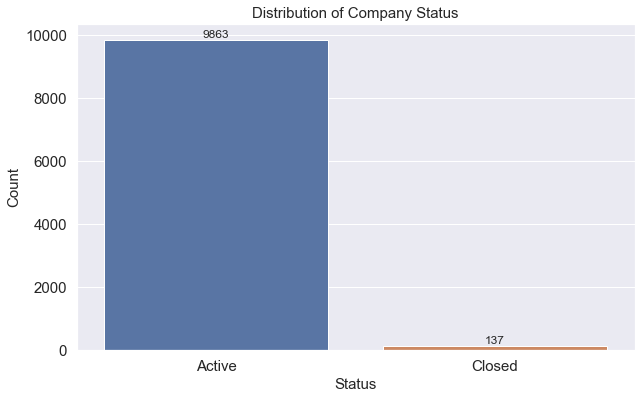

In [378]:
plt.figure(figsize=(10, 6))
status_count = df['Status'].value_counts()
bar_sector = sns.barplot(x = status_count.index, y = status_count.values ,palette="deep")
bar_sector.axes.set_title("Distribution of Company Status",fontsize=15)
bar_sector.set_xlabel("Status",fontsize=15)
bar_sector.set_ylabel("Count",fontsize=15)
bar_sector.tick_params(labelsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
for i,j in zip(bar_sector.patches,status_count.values):
    height = i.get_height()
    bar_sector.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom',fontsize=12)
plt.show()

In [379]:
#drop unwanted columns

df = df.drop(['Name','Full Name','Number of Lead Investment', 'Investment Stage',
              'Number of Investment','Status','Purpose','Primary Organization'], axis=1)

In [380]:
len(df['Type'].unique())

7679

In [381]:
df['Type'].unique()

array([' Ad Server, Advertising, Analytics, Enterprise Software, Security, Web Hosting',
       ' Advertising, Advertising Platforms, Analytics, Artificial Intelligence, Brand Marketing, Computer Vision, Digital Media, Image Recognition, Natural Language Processing, Sports',
       ' Advertising, Brand Marketing, Marketing, Retail', ...,
       ' Developer Tools, Enterprise Software, Software, Web Development',
       ' Human Resources, Local, Professional Services, Small and Medium Businesses, Software',
       ' Collaboration, Enterprise Software, Mobile, Mobile Devices, Software'],
      dtype=object)

In [382]:
df_sectors = ','.join(df['Type'])
df_sectors

" Ad Server, Advertising, Analytics, Enterprise Software, Security, Web Hosting, Advertising, Advertising Platforms, Analytics, Artificial Intelligence, Brand Marketing, Computer Vision, Digital Media, Image Recognition, Natural Language Processing, Sports, Advertising, Brand Marketing, Marketing, Retail, Advertising, Apps, Brand Marketing, Messaging, SaaS, Social Media, Advertising, Digital Entertainment, Film, Media and Entertainment, Advertising, Marketing, Social Media Marketing, Advertising, Analytics, Marketing, Advertising, Broadcasting, Content Creators, Digital Media, Marketing, Music, News, Video, Video Advertising, Advertising, Marketing, SaaS, Search Engine, Advertising, Advertising Platforms, Brand Marketing, Data Integration, Advertising, Content, News, Publishing, Social, Social Media, Video, Ad Network, Ad Targeting, Advertising, Advertising Platforms, Artificial Intelligence, Human Resources, Marketing, Marketing Automation, Advertising, Broadcasting, Digital Media, Jo

In [383]:
sectors = df_sectors.split(',')
sectors

[' Ad Server',
 ' Advertising',
 ' Analytics',
 ' Enterprise Software',
 ' Security',
 ' Web Hosting',
 ' Advertising',
 ' Advertising Platforms',
 ' Analytics',
 ' Artificial Intelligence',
 ' Brand Marketing',
 ' Computer Vision',
 ' Digital Media',
 ' Image Recognition',
 ' Natural Language Processing',
 ' Sports',
 ' Advertising',
 ' Brand Marketing',
 ' Marketing',
 ' Retail',
 ' Advertising',
 ' Apps',
 ' Brand Marketing',
 ' Messaging',
 ' SaaS',
 ' Social Media',
 ' Advertising',
 ' Digital Entertainment',
 ' Film',
 ' Media and Entertainment',
 ' Advertising',
 ' Marketing',
 ' Social Media Marketing',
 ' Advertising',
 ' Analytics',
 ' Marketing',
 ' Advertising',
 ' Broadcasting',
 ' Content Creators',
 ' Digital Media',
 ' Marketing',
 ' Music',
 ' News',
 ' Video',
 ' Video Advertising',
 ' Advertising',
 ' Marketing',
 ' SaaS',
 ' Search Engine',
 ' Advertising',
 ' Advertising Platforms',
 ' Brand Marketing',
 ' Data Integration',
 ' Advertising',
 ' Content',
 ' News',


In [384]:
sectors = pd.DataFrame(df_sectors.split(','),columns=['Type'])
len(sectors['Type'].unique())

675

In [385]:
df_sectors = ','.join(df['Type'])
sectors = df_sectors.split(',')
sectors = pd.DataFrame(df_sectors.split(','),columns=['Type'])
sector_cat_count = sectors['Type'].unique()
len(sector_cat_count)

675

In [386]:
for type in df['Type']:
    type.split(',')
print( type)

 Collaboration, Enterprise Software, Mobile, Mobile Devices, Software


In [387]:
types = []
for type in df['Type']:
    
    sep = ','
    rest = ""
    if len(type.split(sep)) > 7:
        rest = type.split(sep)[1] + ',' + type.split(sep)[2] + ',' + type.split(sep)[3] + ',' + type.split(sep)[4] + ',' + type.split(sep)[5] + ',' + type.split(sep)[6] + ',' + type.split(sep)[7]
    elif len(type.split(sep)) > 6:
        rest = type.split(sep)[1] + ',' + type.split(sep)[2] + ',' + type.split(sep)[3] + ',' + type.split(sep)[4] + ',' + type.split(sep)[5] + ',' + type.split(sep)[6]
    elif len(type.split(sep)) > 5:
        rest = type.split(sep)[1] + ',' + type.split(sep)[2] + ',' + type.split(sep)[3] + ',' + type.split(sep)[4] + ',' + type.split(sep)[5]
    elif len(type.split(sep)) > 4:
        rest = type.split(sep)[1] + ',' + type.split(sep)[2] + ',' + type.split(sep)[3] + ',' + type.split(sep)[4]
    elif len(type.split(sep)) > 3:
        rest = type.split(sep)[1] + ',' + type.split(sep)[2] + ',' + type.split(sep)[3]
    elif len(type.split(sep)) > 2:
        rest = type.split(sep)[1] + ',' + type.split(sep)[2] 
    elif len(type.split(sep)) > 1:
        rest = type.split(sep)[1]
    else:
        rest = type.split(sep)[0]
    types.append(rest)
  
df['Type'] = types

In [388]:
df['Type']

0        Advertising, Analytics, Enterprise Software, ...
1        Advertising Platforms, Analytics, Artificial ...
2                      Brand Marketing, Marketing, Retail
3        Apps, Brand Marketing, Messaging, SaaS, Socia...
4        Digital Entertainment, Film, Media and Entert...
                              ...                        
9995     Artificial Intelligence, FinTech, Fraud Detec...
9996                                       SaaS, Software
9997       Enterprise Software, Software, Web Development
9998     Local, Professional Services, Small and Mediu...
9999     Enterprise Software, Mobile, Mobile Devices, ...
Name: Type, Length: 10000, dtype: object

In [389]:
#find top 25 sectors overall
df_sectors = ','.join(df['Type'])
sectors = df_sectors.split(',')
sectors = pd.DataFrame(df_sectors.split(','),columns=['Type'])
sector_cat_count = sectors['Type'].value_counts()
sector_cat_count = sector_cat_count.sort_values(ascending=False)
top_sectors = sector_cat_count[0:25]

In [390]:
top_sectors

 Software                  960
 Information Technology    881
 Manufacturing             857
 Financial Services        806
 Education                 754
 Internet                  739
 Mobile                    695
 Health Care               688
 FinTech                   629
 Marketing                 544
 SaaS                      524
 E-Commerce                492
 Consulting                486
 Enterprise Software       451
 Medical                   363
 Retail                    337
 Finance                   333
 Machine Learning          311
 Big Data                  250
 Mobile Apps               247
 Social Media              245
 Payments                  228
 Fashion                   227
 Video                     214
 Medical Device            210
Name: Type, dtype: int64

In [391]:
type_df = []
for type in df['Type']:
    types = type.split(',')
    intersect = [x for x in types if x in top_sectors.index]
    strg = ','.join([str(elem) for elem in intersect])
    if not strg:
        strg = "Other"
    type_df.append(strg)
    
df['Type'] = type_df

In [392]:
df_sectors = ','.join(df['Type'])
sectors = pd.DataFrame(df_sectors.split(','),columns=['Type'])
sector_cat_count = sectors['Type'].unique()
len(sector_cat_count)

26

In [393]:
#convert values of different currency to USD 
# !pip install currencyconverter
from currency_converter import CurrencyConverter
def get_symbol(price):
    import re
    pattern =  r'(\D*)\d*\.?\d*(\D*)'
    g = re.match(pattern,price).groups()
    return g[0] 
 

c = CurrencyConverter()
converted_amount = []
for price in df['Funding Amount']:
    if isinstance(price, float):
        converted_amount.append(int(0))
        continue
    symbol = get_symbol(price)
    prc = price.replace(symbol, "").replace(",", "")
    prc = int(prc)
    if symbol == '£':
        prc = c.convert(prc, 'GBP','USD')
    elif symbol == '€':
        prc = c.convert(prc, 'EUR','USD')
    elif symbol == 'IDR':
        prc = c.convert(prc, 'IDR','USD')
    elif symbol == 'NOK':
        prc = c.convert(prc, 'NOK','USD')
    elif symbol == 'PLN':
        prc = c.convert(prc, 'PLN','USD')
    elif symbol == 'CN¥':
        prc = c.convert(prc, 'CNY','USD')
    elif symbol == 'MYR':
        prc = c.convert(prc, 'MYR','USD')
    elif symbol == 'PHP':
        prc = c.convert(prc, 'PHP','USD')
    elif symbol == 'CA$':
        prc = c.convert(prc, 'CAD','USD')
    elif symbol == 'RUB':
        prc = c.convert(prc, 'RUB','USD')
    elif symbol == 'SEK':
        prc = c.convert(prc, 'SEK','USD')
    elif symbol == 'CHF':
        prc = c.convert(prc, 'CHF','USD')
    elif symbol == 'ISK':
        prc = c.convert(prc, 'ISK','USD')
    elif symbol == 'TRY':
        prc = c.convert(prc, 'TRY','USD')
    elif symbol == 'SGD':
        prc = c.convert(prc, 'SGD','USD')
    elif symbol == 'ZAR':
        prc = c.convert(prc, 'ZAR','USD')
    elif symbol == 'DKK':
        prc = c.convert(prc, 'DKK','USD')
    elif symbol == 'A$':
        prc = c.convert(prc, 'AUD','USD')
    elif symbol == '₹':
        prc = c.convert(prc, 'INR','USD')
    elif symbol == 'R$':
        prc = c.convert(prc, 'BRL','USD')
    elif symbol == '¥':
        prc = c.convert(prc, 'JPY','USD')
    elif symbol == '₩':
        prc = c.convert(prc, 'KRW','USD')
    elif symbol == 'MX$':
        prc = c.convert(prc, 'MXN','USD')
    elif symbol == 'NZ$':
        prc = c.convert(prc, 'NZD','USD')
    elif symbol == '₪':
        prc = c.convert(prc, 'ILS','USD')
    elif symbol != '$':
        df = df[df['Funding Amount'] != price]
        continue
    else:
        converted_amount.append(prc)
        continue
    prc = round(prc)
    converted_amount.append(prc)

In [394]:
#Categorize Funding Amount
cc_amount = pd.cut(converted_amount,bins=[-1,1000000,10000000,100000000,30079814466],
       labels=['Less than $1M','$1M to $10M','$10M to 100M','100M+'])
df['Funding Amount'] = cc_amount

In [395]:
df['Funding Amount'].value_counts()

$10M to 100M     3965
$1M to $10M      2927
Less than $1M    1558
100M+            1541
Name: Funding Amount, dtype: int64

In [396]:
df['Acquisition Status'].value_counts()

 Made Acquisitions\r\n                  1557
 Was Acquired\r\n                        861
 Made Acquisitions, Was Acquired\r\n     471
Name: Acquisition Status, dtype: int64

In [397]:
# Merge Acquisition Status

df['Acquisition Status'] = df['Acquisition Status'].astype(str)

In [398]:
df['Acquisition Status'] = df['Acquisition Status'].map(lambda x: re.sub(r'\W+', '', x))

In [399]:
df['Acquisition Status'] = df['Acquisition Status'].replace(to_replace ="MadeAcquisitionsWasAcquired", value = "Merger")
df['Acquisition Status'] = df['Acquisition Status'].replace(to_replace ="WasAcquired", value = "Merger")
df['Acquisition Status'] = df['Acquisition Status'].replace(to_replace ="MadeAcquisitions", value = "Acquisition")
df['Acquisition Status'] = df['Acquisition Status'].replace(to_replace ='nan',value = 'No Participation')

In [400]:
df['Acquisition Status']

0            Acquisition
1       No Participation
2            Acquisition
3            Acquisition
4       No Participation
              ...       
9995              Merger
9996         Acquisition
9997         Acquisition
9998    No Participation
9999              Merger
Name: Acquisition Status, Length: 9991, dtype: object

In [401]:
# Categorize Job Titles into Most common 6 Titles

df['Job Title'].fillna("Other", inplace = True)
df['Job Title'] =  df['Job Title'].str.upper()
df['Job Title'] =  df['Job Title'].apply(lambda x: x.strip())

In [402]:
df['Job Title']

0                           CO-FOUNDER & CEO
1       CO-FOUNDER & CHIEF EXECUTIVE OFFICER
2                      CHAIRMAN & CO-FOUNDER
3                              CEO & FOUNDER
4                                      OTHER
                        ...                 
9995                           FOUNDER & CEO
9996                                 PARTNER
9997                        CEO & CO-FOUNDER
9998                 CO-FOUNDER, CLIENT LEAD
9999                   CO-FOUNDER & CHAIRMAN
Name: Job Title, Length: 9991, dtype: object

In [403]:
# Categorize common Bizzare words into particular job title
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF EXECUTIVE OFFICER','CHIEF EXECUTIVE','C.E.O','CEO (CEO)','CEO (EMEA)',
                                                      'CEO INTERNATIONAL','CEO CO-FOUNDER','CEO (CEO)','FOUNDER (CEO)','CEO CROSSBORDER',
                                                     'CEO - HYPERGIANT INDUSTRIES','CEO - HYPERGIANT INDUSTRIES','FOUNDING CEO','CEO OF BLIZZARD ENTERTAINMENT',
                                                     'CEO (FMR. CTO)','CEO OF 3D NANO BATTERIES LLC','MD - CEO','CEO OF 3D NANO BATTERIES LLC','CO-CEO',
                                                     'CEO OF STITCH','CEO OFFCER','CO - CEO','FOUNDER - CEO','CEO TECHHUB','FOUNDER I CEO','CEO IN RESIDENCE'
                                                     ]):'CEO'},regex=True)

In [404]:
df['Job Title'] = df['Job Title'].replace({'|'.join(['CO FOUNDER','COFOUNDER','CO - FOUNDER','CO- FOUNDER','CO-FOUNDER','CO -FOUNDER',
                                                               'CO-FOUNDER - MYPROTEIN GROUP','CO-FOUNDER','MEMBER OF FOUNDING TEAM','TITLECO-FOUNDER',
                                                               'CO-FOUNDER - STARTUPBOOTCAMP AFRICA','FOUNDER']):'CO-FOUNDER'},regex=True)

In [405]:
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF TECHNOLOGY OFFICER','CHIEF TECHNICAL OFFICER','CTO SOFTWARE','CHIEF TECHNOLOGY','CTO'
                                                     ]):'CTO'},regex=True)
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF OPERATING OFFICER']):'COO'},regex=True)
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF PRODUCT OFFICER','CPO ITALY']):'CPO'},regex=True)

In [406]:
df['Job Title'] = df['Job Title'].replace({'|'.join(['VICE PRESIDENT','VICE PRESIDENT OF ENGINEERING','VP OF RESEARCH','VP OF STRATEGIC BUSINESS DEVELOPMENT',
                                                      'VP IMAGING SYSTEMS','VP BUSINESS DEVELOPMENT','CORPORATE VICE PRESIDENT','VP OF ENGINEERING','VP OF PRODUCT',
                                                      'VP OF LEARNING AT WORK','VP BUSINESS DEVELOPMENT','VP PRODUCT','VP ENGINEERING','VP MARKETING','VP PRODUCT MANAGEMENT',
                                                      'VP MACHINE LEARNING','EXECUTIVE VICE-PRESIDENT','VICE-PRESIDENT','VP OPERATIONS','VP R','VP MANAGEMENT','VP - COMMERCIAL',
                                                      'VP OF GROWTH','VP OF TECHNOLOGY','VP OF OPS','VP CONTENT','VP MANAGEMENT','VP OF PRODUCT','VP OF TECHNOLOGY',
                                                      'VP OF INVESTMENTS','VP TECHNOLOGY','VP OF PROFESSIONAL SERVICES','VP DATA','VP OF INNOVATION','VP OF GROWTH'
                                                      'VP OF STRATEGIC BUSINESS DEVELOPMENT','VP OF ALGORITHMS','VP - ENTERPRISE DEVELOPMENT','VP OF SPECIAL PROJECTS (POSTMATES X)',
                                                      'V.P. MATERIALS DEVELOPMENT','VP OF STRATEGIC INITIATIVES','VP STRATEGY','CORPORATE VP',
                                                     'VP OF INVESTOR RELATIONS']):'VP'},regex=True)

In [407]:
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF MARKETING OFFICER']):'CMO'},regex=True)
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF FINANCIAL OFFICER']):'CFO'},regex=True)
df['Job Title'] = df['Job Title'].replace({'|'.join(['CHIEF COMMERCIAL OFFICER']):'CCO'},regex=True)

In [408]:
df['Job Title'] = df['Job Title'].replace({'|'.join(['MANAGING DIRECTOR','DIRECTOR','MANAGING DIRECTOR SOUTHEAST ASIA','MANAGING DIRECTOR OPERATIONS',
                                                     'GLOBAL MD','MD MIDDLE EAST INTERNET GROUP','BUSINESS DEVELOPMENT MD','MEDICAL MD',
                                                     'NON-EXECUTIVE MD','CREATIVE MD OF ADVERTISING','EXECUTIVE MD OF THE HYPERLEDGER PROJECT',
                                                     'MD OF ENGINEERING','MD OF MARKETING','FINANCE MD','CREATIVE MD','MD OF FINANCE','GENERAL MD',
                                                     'MD HONG KONG','MD OF R','MD OF THE STANFORD AI LAB','MD OF GLOBAL ACQUIRING','REGIONAL MD'
                                                     'GROUP MD','PROGRAM MD','MD OF PURCHASING','MD OF GLOBAL FINANCIAL SOLUTIONS','MD OF SPECIAL PROJECTS',
                                                     'TECHNICAL MD','MD OF BD','SR. MD','PRESIDENT MD','SENIOR MD OF INVESTMENTS','MD OF TECHNOLOGY',
                                                     'MD OPERATIONS','MD OF PRODUCT','REGIONAL MD','FOUNDING MD']):'MD'},regex=True)

In [409]:
df['Job Title'] = df['Job Title'].replace({'|'.join(['BOARD MEMBER','CHAIRMAN OF THE BOARD','BOARD OF DIRECTORS','MEMBER OF THE BOARD OF DIRECTORS',
                                                               'CHAIRMAN OF THE BOARD OF DIRECTORS','BOARD DIRECTOR','MEMBER OF THE BOARD','BOARD MEMBERS',
                                                               'BOD OF DIRECTORS','BOARD CHAIRMAN','MEMBER OF BOARD','BOARD OF DIRECTER','BOD OF MDS',
                                                                'BOARD OF MDS','BOARD OF MD','ADVISORY BOD','CHAIRMAN OF BOD','BOARD MD','BOARD OF OVERSEERS'
                                                     ]):'BOD'},regex=True)

df['Job Title'] = df['Job Title'].replace({'|'.join(['SENIOR VP','SENIOR VP OF MANUFACTURING','SVP OF SALES','VP OF ENTREPRENEURSHIP','SPV','SVP DIGITAL PRODUCT',
                                                     'SPV OF PRODUCT','SVP OF R','SPV OF MARKETING','SR. VP','SVP OF MANUFACTURING','SVP INNOVATION']):'SVP'},regex=True)

In [410]:
df['Job Title']

0              CO-FOUNDER & CEO
1              CO-FOUNDER & CEO
2         CHAIRMAN & CO-FOUNDER
3              CEO & CO-FOUNDER
4                         OTHER
                 ...           
9995           CO-FOUNDER & CEO
9996                    PARTNER
9997           CEO & CO-FOUNDER
9998    CO-FOUNDER, CLIENT LEAD
9999      CO-FOUNDER & CHAIRMAN
Name: Job Title, Length: 9991, dtype: object

In [411]:
# Top 6 titles
df_title = ' & '.join(df['Job Title'])
df_title = df_title.replace('AND','&').replace(',','&').replace('/','&').replace('|','&').replace('+','&')
titles = pd.DataFrame(df_title.split('&'),columns=['Job Title'])
titles['Job Title'] = titles['Job Title'].apply(lambda x: x.strip())

In [412]:
title_count = titles['Job Title'].value_counts()
title_count = title_count.sort_values(ascending=False)
top_titles = title_count[0:6]
top_titles

CO-FOUNDER          6340
CEO                 4126
OTHER               1058
PRESIDENT            425
CTO                  393
MANAGING PARTNER     380
Name: Job Title, dtype: int64

In [413]:
#replace entire dataframe with top 6 Job titles
titles_df=[]
for type in df['Job Title']:
    type = type.replace('AND','&').replace(',','&').replace('/','&').replace('|','&').replace('+','&')
    types=type.split('&')
    intersect= [x.strip() for x in types if x.strip() in top_titles.index]
    strg = '&'.join([str(elem) for elem in intersect])
    if not strg:
        strg = 'OTHER'
    titles_df.append(strg)
    
df['Job Title'] = titles_df

In [414]:
df['Job Title']

0       CO-FOUNDER&CEO
1       CO-FOUNDER&CEO
2           CO-FOUNDER
3       CEO&CO-FOUNDER
4                OTHER
             ...      
9995    CO-FOUNDER&CEO
9996             OTHER
9997    CEO&CO-FOUNDER
9998        CO-FOUNDER
9999        CO-FOUNDER
Name: Job Title, Length: 9991, dtype: object

In [415]:
#Headquaters wise data cleaning

df_h_list = []
countries = []
states = []
cities = []
for i in df['Headquaters']:
    df_h = i.split(',')
    df_h_list.append(df_h)
for i in df_h_list:
    if(len(i)==3):
        i[2] = i[2].strip()
        countries.append(i[2])
        states.append(i[1])
        cities.append(i[0])

        
countries_df = pd.DataFrame(countries,columns = ['Countries'])

In [416]:
countries_df['Countries'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Singapore', 'India',
       'Denmark', 'Japan', 'Israel', 'Italy', 'Venezuela', 'Sweden',
       'France', 'Germany', 'Australia', 'Taiwan', 'Spain', 'Indonesia',
       'The Netherlands', 'Estonia', 'South Korea', 'Finland', 'China',
       'Brazil', 'Norway', 'Poland', 'Thailand', 'New Zealand',
       'Russian Federation', 'Hong Kong', 'Philippines', 'Switzerland',
       'Portugal', 'Hungary', 'Ireland', 'United Arab Emirates',
       'Macedonia', 'Argentina', 'South Africa', 'Malaysia', 'Chile',
       'Romania', 'Pakistan', 'Greece', 'Belgium', 'Egypt', 'Colombia',
       'Ukraine', 'Kenya', 'Latvia', 'Austria', 'Turkey', 'Saudi Arabia',
       'Czech Republic', 'Jordan', 'Morocco', 'Iceland', 'Uganda',
       'Mexico', 'Qatar', 'Bangladesh', 'Bermuda', 'Trinidad and Tobago',
       'Slovenia', 'Lithuania', 'Senegal', 'Luxembourg', 'Nigeria',
       'Serbia', 'Vietnam', 'Kuwait', 'Belarus', "Côte d'Ivoire",
       'Uruguay', 'C

In [417]:
import pandas as pd
df1 = pd.read_csv('country_cont.csv')

In [418]:
df1

Continent_Name Continent_Code  \
0             Asia             AS   
1           Europe             EU   
2       Antarctica             AN   
3           Africa             AF   
4          Oceania             OC   
..             ...            ...   
257         Africa             AF   
258        Oceania             OC   
259           Asia             AS   
260           Asia             AS   
261           Asia             AS   

                                     Country_Name Two_Letter_Country_Code  \
0                Afghanistan, Islamic Republic of                      AF   
1                            Albania, Republic of                      AL   
2    Antarctica (the territory South of 60 deg S)                      AQ   
3        Algeria, People's Democratic Republic of                      DZ   
4                                  American Samoa                      AS   
..                                            ...                     ...   
257                           Zambia, Republic of                      ZM   
258                            Disputed Territory                      XX   
259                Iraq-Saudi Arabia Neutral Zone                      XE   
260                   United Nations Neutral Zone                      XD   
261                               Spratly Islands                      XS   

    Three_Letter_Country_Code  Country_Number  
0                         AFG             4.0  
1                         ALB             8.0  
2                         ATA            10.0  
3                         DZA            12.0  
4                         ASM            16.0  
..                        ...             ...  
257                       ZMB           894.0  
258                       NaN             NaN  
259                       NaN             NaN  
260                       NaN             NaN  
261                       NaN             NaN  

[262 rows x 6 columns]

In [419]:
asia1 = []
africa1 = []
south_america1 = []
north_america1 = []
europe1 = []
oceania1 = []
asia = df1['Continent_Name']=='Asia'
for i in df1[asia]['Country_Name']:
    i = i.split(',')
    i[0] = i[0].strip()
    asia1.append(i[0])
    
africa = df1['Continent_Name']=='Africa'
for i in df1[africa]['Country_Name']:
    i = i.split(',')
    i[0] = i[0].strip()
    africa1.append(i[0])
    
na = df1['Continent_Name']=='North America'
for i in df1[na]['Country_Name']:
    i = i.split(',')
    i[0] = i[0].strip()
    north_america1.append(i[0])


sa = df1['Continent_Name']=='South America'
for i in df1[sa]['Country_Name']:
    i = i.split(',')
    i[0] = i[0].strip()
    south_america1.append(i[0])


europe = df1['Continent_Name']=='Europe'
for i in df1[europe]['Country_Name']:
    i = i.split(',')
    i[0] = i[0].strip()
    europe1.append(i[0])

oceania = df1['Continent_Name']=='Oceania'
for i in df1[oceania]['Country_Name']:
    i = i.split(',')
    i[0] = i[0].strip()
    oceania1.append(i[0])


In [420]:
countries_df['Countries'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Singapore', 'India',
       'Denmark', 'Japan', 'Israel', 'Italy', 'Venezuela', 'Sweden',
       'France', 'Germany', 'Australia', 'Taiwan', 'Spain', 'Indonesia',
       'The Netherlands', 'Estonia', 'South Korea', 'Finland', 'China',
       'Brazil', 'Norway', 'Poland', 'Thailand', 'New Zealand',
       'Russian Federation', 'Hong Kong', 'Philippines', 'Switzerland',
       'Portugal', 'Hungary', 'Ireland', 'United Arab Emirates',
       'Macedonia', 'Argentina', 'South Africa', 'Malaysia', 'Chile',
       'Romania', 'Pakistan', 'Greece', 'Belgium', 'Egypt', 'Colombia',
       'Ukraine', 'Kenya', 'Latvia', 'Austria', 'Turkey', 'Saudi Arabia',
       'Czech Republic', 'Jordan', 'Morocco', 'Iceland', 'Uganda',
       'Mexico', 'Qatar', 'Bangladesh', 'Bermuda', 'Trinidad and Tobago',
       'Slovenia', 'Lithuania', 'Senegal', 'Luxembourg', 'Nigeria',
       'Serbia', 'Vietnam', 'Kuwait', 'Belarus', "Côte d'Ivoire",
       'Uruguay', 'C

In [421]:
for i in countries_df['Countries']:
    if(i == 'South Korea'):
        countries_df['Countries'].replace(i,'Asia',inplace = True)

    if(i in asia1):
        countries_df['Countries'].replace(i,'Asia',inplace = True)

for i in countries_df['Countries']:
    if(i == 'United States'):
        countries_df['Countries'].replace(i,'North America',inplace = True)
    if(i in north_america1):
        countries_df['Countries'].replace(i,'North America',inplace = True)
    
for i in countries_df['Countries']:
    if(i == "Côte d'Ivoire"):
        countries_df['Countries'].replace(i,'Africa',inplace = True)

    if(i in africa1):
        countries_df['Countries'].replace(i,'Africa',inplace = True)

for i in countries_df['Countries']:
    if(i in oceania1):
        countries_df['Countries'].replace(i,'Australia',inplace = True)

for i in countries_df['Countries']:
    if(i in south_america1):
        countries_df['Countries'].replace(i,'South America',inplace = True)

for i in countries_df['Countries']:
    if(i=='United Kingdom'):
        countries_df['Countries'].replace(i,'Europe',inplace = True)
    if(i=='The Netherlands'):
        countries_df['Countries'].replace(i,'Europe',inplace = True)

    if(i in europe1):
        countries_df['Countries'].replace(i,'Europe',inplace = True)

In [422]:
countries_df['Countries'].unique()

array(['North America', 'Europe', 'Asia', 'South America', 'Australia',
       'Africa'], dtype=object)

In [423]:
df['Headquaters'] = countries_df['Countries']
countries_df['Countries'].unique()

array(['North America', 'Europe', 'Asia', 'South America', 'Australia',
       'Africa'], dtype=object)

In [424]:
df['Headquaters'].replace(np.nan,'North America',inplace = True)

In [425]:
df['Number of employees'].value_counts()

11-50         3342
51-100        1367
101-250       1332
1-10          1124
251-500        649
501-1000       517
1001-5000      435
10001+         297
5001-10000     163
Name: Number of employees, dtype: int64

In [426]:
#Categorize number of Employees

df['Number of employees'].replace(np.nan,'11-50',inplace = True)
df['Number of employees'].replace('1-10','<10',inplace = True)
df['Number of employees'].replace('11-50','11-50',inplace = True)
df['Number of employees'].replace('51-100','50-100',inplace = True)

df['Number of employees'].replace('101-250','100-500',inplace = True)
df['Number of employees'].replace('251-500','100-500',inplace = True)

df['Number of employees'].replace('501-1000','500-5000',inplace = True)
df['Number of employees'].replace('1001-5000','500-5000',inplace = True)

df['Number of employees'].replace('5001-10000','>5000',inplace = True)
df['Number of employees'].replace('10001+','>5000',inplace = True)

In [427]:
df['Number of employees'].unique()

array(['500-5000', '100-500', '11-50', '50-100', '<10', '>5000'],
      dtype=object)

In [428]:
df['Number of employees'].value_counts()

11-50       4107
100-500     1981
50-100      1367
<10         1124
500-5000     952
>5000        460
Name: Number of employees, dtype: int64

In [429]:
df['Estimated Revenue'].unique()

array(['$100M to $500M', '$1M to $10M', '$1B to $10B', '$10M to $50M',
       '$500M to $1B', 'Less than $1M', '$50M to $100M', nan, '$10B+'],
      dtype=object)

In [430]:
df['Estimated Revenue'].value_counts()

$1M to $10M       3089
$10M to $50M      1217
Less than $1M      838
$100M to $500M     409
$50M to $100M      310
$1B to $10B        201
$500M to $1B       112
$10B+               77
Name: Estimated Revenue, dtype: int64

In [431]:
#Estimated Revenue Categorization


df['Estimated Revenue'].replace('Less than $1M','Less than $1M',inplace = True)

df['Estimated Revenue'].replace('$1M to $10M','$1M - $10M',inplace = True)

df['Estimated Revenue'].replace('$10M to $50M','$10M - $100M',inplace = True)
df['Estimated Revenue'].replace('$50M to $100M','$10M - $100M',inplace = True)

df['Estimated Revenue'].replace('$100M to $500M','$100M-$1B+',inplace = True)
df['Estimated Revenue'].replace('$500M to $1B','$100M-$1B+',inplace = True)
df['Estimated Revenue'].replace('$1B to $10B','$100M-$1B+',inplace = True)
df['Estimated Revenue'].replace('$10B+','$100M-$1B+',inplace = True)

df['Estimated Revenue'].replace(np.nan,'$1M to $10M',inplace = True) #mode

df['Estimated Revenue'].unique()

array(['$100M-$1B+', '$1M - $10M', '$10M - $100M', 'Less than $1M',
       '$1M to $10M'], dtype=object)

In [432]:
# Categorize Founders 

df['Founders'].value_counts()

2     3074
1     2934
3     1626
4      633
5      169
6       65
7       20
8        9
9        3
10       2
12       1
11       1
Name: Founders, dtype: int64

In [433]:
df['Founders'] = df['Founders'].fillna('2')
df['Founders']

0       3
1       2
2       1
3       3
4       1
       ..
9995    2
9996    2
9997    3
9998    1
9999    2
Name: Founders, Length: 9991, dtype: object

In [434]:
df = df.loc[df['Founders'].astype(float) <= 7]

In [435]:
df['Founders']= df['Founders'].astype(float) 

In [436]:
df['Founders'].value_counts()

2.0    4528
1.0    2934
3.0    1626
4.0     633
5.0     169
6.0      65
7.0      20
Name: Founders, dtype: int64

In [437]:
df['Founders']=pd.cut(df['Founders'], bins=[0,1,2,7], labels = ["1","2","3-7"])
df['Founders'].value_counts()

2      4528
1      2934
3-7    2513
Name: Founders, dtype: int64

In [438]:
#Acquisitions contain 7k null values consider dropping the column
df['Acquisitions'].value_counts()
df['Acquisitions'].isnull().sum()

7950

In [439]:
#binning funding rounds and removed outliers
df['Funding Rounds'].value_counts()

1     2133
2     1949
3     1658
4     1252
5      860
6      603
7      359
8      214
9      118
10      80
11      35
12      33
13      25
14      11
15       9
16       5
17       4
19       3
20       2
21       2
18       2
25       1
22       1
Name: Funding Rounds, dtype: int64

In [440]:
df['Funding Rounds']= df['Funding Rounds'].astype(float)
df['Funding Rounds']= df['Funding Rounds'].fillna('3')
df = df.loc[df['Funding Rounds'].astype(float) <= 13]
df['Funding Rounds'] = df['Funding Rounds'].astype(float)
df['Funding Rounds'] = pd.cut(df['Funding Rounds'], bins =[0,1,4,13], labels =["1","2-4","5-13"])

In [441]:
df['Funding Rounds'].value_counts()

2-4     5475
5-13    2327
1       2133
Name: Funding Rounds, dtype: int64

# Normalize Active Products

In [442]:
import plotly.express as px
fig = px.box(df, y='Active Products', hover_data= ["Active Products"], width=400, height=400)
fig.update_layout(
    yaxis = dict(range=[0, 500]),
    yaxis_title="Active Products Distribution",
    font=dict(
         size=12
    )
)
fig.show()

In [443]:
def normalize_outliers(data):
    threshold = 1.5
    for col in data.columns:
        normalized_data = []
        mean = np.mean(data[col])
        std = np.std(data[col])
        for y in data[col]:
            z_score = (y - mean)/std
            if np.abs(z_score) > threshold:
                normalized_data.append(mean)
            else:
                normalized_data.append(y)
        data[col] = normalized_data
    return data

In [444]:
z = pd.DataFrame(df['Active Products'].astype(float))

In [445]:
z['Active Products'] = z.fillna(z['Active Products'].astype(float).mean())
z

Active Products
0               106.0
1                34.0
2                 5.0
3               157.0
4                23.0
...               ...
9995             38.0
9996             97.0
9997             31.0
9998             31.0
9999             29.0

[9935 rows x 1 columns]

In [446]:
z = normalize_outliers(z)
z

Active Products
0           23.656322
1           34.000000
2            5.000000
3           23.656322
4           23.000000
...               ...
9995        38.000000
9996        23.656322
9997        31.000000
9998        31.000000
9999        29.000000

[9935 rows x 1 columns]

In [447]:
import plotly.express as px
fig = px.box(z, y='Active Products', hover_data= ["Active Products"], width=400, height=400)
fig.update_layout(
    yaxis = dict(range=[0, 150]),
    yaxis_title="Active Product Distribution",
    font=dict(
         size=12
    )
)
fig.show()

In [448]:
#binning Active products
df['Active Products'] = z
df['Active Products']= df['Active Products'].astype(float) 
df['Active Products']=pd.cut(df['Active Products'], bins=[-1,10.0,22.0,30.0,60.0], labels = ["1-10","11-22","23-30","31-60"])

In [449]:
df['Active Products']

0       23-30
1       31-60
2        1-10
3       23-30
4       23-30
        ...  
9995    31-60
9996    23-30
9997    31-60
9998    31-60
9999    23-30
Name: Active Products, Length: 9935, dtype: category
Categories (4, object): [1-10 < 11-22 < 23-30 < 31-60]

In [450]:
df['Nunmber of Lead Investors'] = df['Nunmber of Lead Investors'].fillna('2')

In [451]:
df['Nunmber of Lead Investors'].isna().sum()

0

In [452]:
df['Nunmber of Lead Investors'].dtype

dtype('O')

In [453]:
df['Nunmber of Lead Investors'] = df['Nunmber of Lead Investors'].astype(float)

In [454]:
df['Nunmber of Lead Investors']=pd.cut(df['Nunmber of Lead Investors'], bins=[0,1,3,15], labels = ["1","2-3","4-15"])

In [455]:
df['Nunmber of Lead Investors']

0       4-15
1       4-15
2        2-3
3       4-15
4          1
        ... 
9995     2-3
9996    4-15
9997     2-3
9998     2-3
9999     2-3
Name: Nunmber of Lead Investors, Length: 9935, dtype: category
Categories (3, object): [1 < 2-3 < 4-15]

In [456]:
#Bining Number of Investors

df['Nmber of Investors']= df['Nmber of Investors'].astype(float) 
print(df['Nmber of Investors'].median())

df['Nmber of Investors'] = df['Nmber of Investors'].fillna('5')

df['Nmber of Investors'] = df['Nmber of Investors'].astype(float)
df['Nmber of Investors']=pd.cut(df['Nmber of Investors'], bins=[0,1,4,9,104], labels = ["1","2-3","4-20", "21-104"])

5.0


In [457]:
df['Nmber of Investors']

0       21-104
1         4-20
2         4-20
3       21-104
4       21-104
         ...  
9995    21-104
9996    21-104
9997    21-104
9998      4-20
9999       2-3
Name: Nmber of Investors, Length: 9935, dtype: category
Categories (4, object): [1 < 2-3 < 4-20 < 21-104]

In [458]:
#Binning Founded organizations
df['Founded Organization']= df['Founded Organization'].astype(float) 
print(df['Founded Organization'].median())
df['Founded Organization'] = df['Founded Organization'].fillna('2')

df['Founded Organization']  = df['Founded Organization'] .astype(float)
df['Founded Organization'] =pd.cut(df['Founded Organization'] , bins=[0,1,3,23], labels = ["1","2-3","4-23"])

2.0


In [459]:
df['Founded Organization']

0        2-3
1       4-23
2       4-23
3        2-3
4       4-23
        ... 
9995       1
9996     2-3
9997       1
9998       1
9999     2-3
Name: Founded Organization, Length: 9935, dtype: category
Categories (3, object): [1 < 2-3 < 4-23]

In [460]:
df['Founded Organization'].isna().sum()

0

In [461]:
#binning Portfolio companies

df['Portfolio Companies']= df['Portfolio Companies'].astype(float) 
print(df['Portfolio Companies'].median())
df['Portfolio Companies'] = df['Portfolio Companies'].fillna('3')

df['Portfolio Companies']  = df['Portfolio Companies'].astype(float)
df['Portfolio Companies'] =pd.cut(df['Portfolio Companies'], bins=[0,2,3,208], labels = ["1-2","3","4-208"])

3.0


In [462]:
df['Portfolio Companies']

0         1-2
1           3
2           3
3           3
4           3
        ...  
9995        3
9996    4-208
9997        3
9998        3
9999        3
Name: Portfolio Companies, Length: 9935, dtype: category
Categories (3, object): [1-2 < 3 < 4-208]

In [463]:
# funding status

val = df['Funding Status'].mode()
print(val)
df['Funding Status'] = df['Funding Status'].fillna('Early Stage Venture')

0    Early Stage Venture
dtype: object


In [464]:
df['Funding Status'].isna().sum()

0

In [465]:
df.head()

Unnamed: 0                  Type    Headquaters  Founded Year  \
0           0   Enterprise Software  North America      Jun 2009   
1           1                 Other  North America          2008   
2           2     Marketing, Retail  North America          2010   
3           3    SaaS, Social Media  North America  Nov 28, 2008   
4           4                 Other  North America          2014   

      Exit Date Estimated Revenue Founders Number of employees Funding Rounds  \
0  Sep 12, 2019        $100M-$1B+      3-7            500-5000           5-13   
1           NaN        $1M - $10M        2             100-500           5-13   
2           NaN        $100M-$1B+        1             100-500            2-4   
3           NaN      $10M - $100M      3-7            500-5000           5-13   
4           NaN        $1M - $10M        1             100-500            2-4   

       Funding Status  ... Nunmber of Lead Investors Nmber of Investors  \
0                 IPO  ...                      4-15             21-104   
1  Late Stage Venture  ...                      4-15               4-20   
2      Private Equity  ...                       2-3               4-20   
3  Late Stage Venture  ...                      4-15             21-104   
4  Late Stage Venture  ...                         1             21-104   

  Acquired Price Acquisitions Acquisition Status Acquired By IPO status  \
0            NaN            5        Acquisition         NaN     Public   
1            NaN          NaN   No Participation         NaN    Private   
2            NaN            9        Acquisition         NaN    Private   
3            NaN           12        Acquisition         NaN    Private   
4            NaN          NaN   No Participation         NaN    Private   

        Job Title Founded Organization Portfolio Companies  
0  CO-FOUNDER&CEO                  2-3                 1-2  
1  CO-FOUNDER&CEO                 4-23                   3  
2      CO-FOUNDER                 4-23                   3  
3  CEO&CO-FOUNDER                  2-3                   3  
4           OTHER                 4-23                   3  

[5 rows x 22 columns]

In [466]:
#categorical feature
categorical_feature = [features for features in df.columns if df[features].dtype =='O']

In [467]:
print('Number of categorical variables:', len(categorical_feature)) 

Number of categorical variables: 13


In [468]:
#number of categories in each feature
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is Type and number of categories are 548
The feature is Headquaters and number of categories are 6
The feature is Founded Year and number of categories are 1906
The feature is Exit Date and number of categories are 1422
The feature is Estimated Revenue and number of categories are 5
The feature is Number of employees and number of categories are 6
The feature is Funding Status and number of categories are 6
The feature is Acquired Price and number of categories are 279
The feature is Acquisitions and number of categories are 60
The feature is Acquisition Status and number of categories are 3
The feature is Acquired By and number of categories are 1067
The feature is IPO status and number of categories are 3
The feature is Job Title and number of categories are 35


# Continent wise distribution

In [469]:
countries_cat_count  = df['Headquaters'].value_counts()

In [470]:
countries_cat_count  = countries_cat_count .sort_values(ascending = False)

North America    5967
Europe           1932
Asia             1717
Australia         132
South America     110
Africa             77
Name: Headquaters, dtype: int64


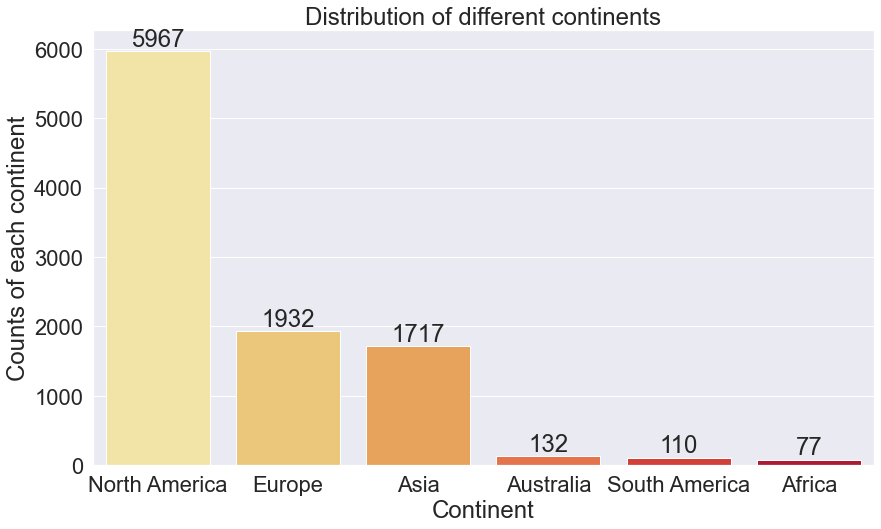

In [471]:
print(countries_cat_count)
plt.figure(figsize=(14,8))
bar_countries = sns.barplot(x =countries_cat_count.index, y = countries_cat_count.values,palette="YlOrRd")
sns.set_style("white")
plt.title('Distribution of different continents')
plt.xlabel('Continent')
plt.ylabel('Counts of each continent')
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
for i,j in zip(bar_countries.patches,countries_cat_count.values):
    height = i.get_height()
    bar_countries.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.savefig('Headquaters.png',bbox_inches='tight')

# Top 30 Sectors

In [472]:
df['Type'].value_counts()

Other                                       1576
 Manufacturing                               757
 Education                                   578
 Information Technology                      557
 Internet                                    454
                                            ... 
 Health Care, Machine Learning, SaaS           1
 Enterprise Software, Internet, Payments       1
 Financial Services, FinTech, Retail           1
 Internet, SaaS, Video                         1
 Health Care, Medical, Social Media            1
Name: Type, Length: 548, dtype: int64

In [473]:
df_sectors = ','.join(df['Type'])

In [474]:
sectors =pd.DataFrame(df_sectors.split(','),columns=['Type'])
sector_cat_count = sectors['Type'].value_counts()

In [475]:
sector_cat_count

Other                      1576
 Software                   954
 Information Technology     879
 Manufacturing              846
 Financial Services         797
 Education                  752
 Internet                   733
 Mobile                     690
 Health Care                679
 FinTech                    622
 Marketing                  541
 SaaS                       523
 E-Commerce                 489
 Consulting                 484
 Enterprise Software        446
 Medical                    358
 Retail                     335
 Finance                    327
 Machine Learning           311
 Big Data                   249
 Mobile Apps                246
 Social Media               243
 Fashion                    227
 Payments                   224
 Video                      211
 Medical Device             205
Name: Type, dtype: int64

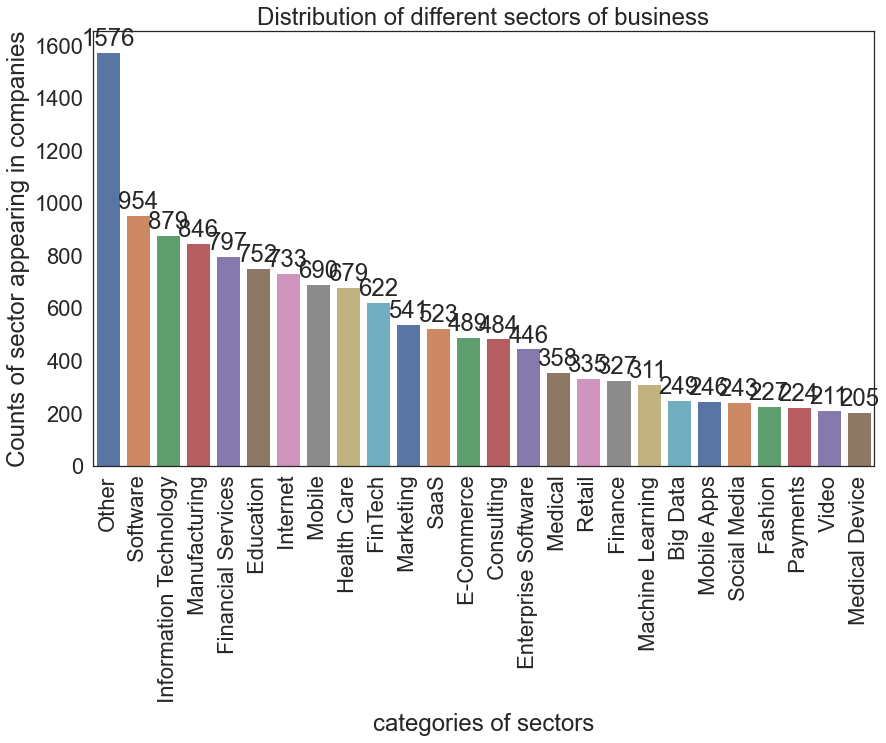

In [476]:
plt.figure(figsize=(14,8))
bar_sector = sns.barplot(x= sector_cat_count.index, y = sector_cat_count.values , palette='deep')
sns.set_style("white")
plt.title('Distribution of different sectors of business')
plt.xlabel('categories of sectors')
plt.ylabel('Counts of sector appearing in companies')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for j,i in enumerate(bar_sector.patches):
    height = i.get_height()
    bar_sector.text(i.get_x() + i.get_width()/2, height + 5, sector_cat_count[j], ha='center', va='bottom')
plt.savefig('Sectors.png',bbox_inches='tight')

# Top 6 Job Titles

In [477]:
df_title ='&'.join(df['Job Title'])

In [478]:
titles =pd.DataFrame(df_title.split('&'),columns =['Job Title'])

In [479]:
title_count = titles['Job Title'].value_counts()
title_count = title_count.sort_values(ascending=False)

In [480]:
title_count

CO-FOUNDER          6310
CEO                 4102
OTHER               2398
PRESIDENT            422
CTO                  389
MANAGING PARTNER     377
Name: Job Title, dtype: int64

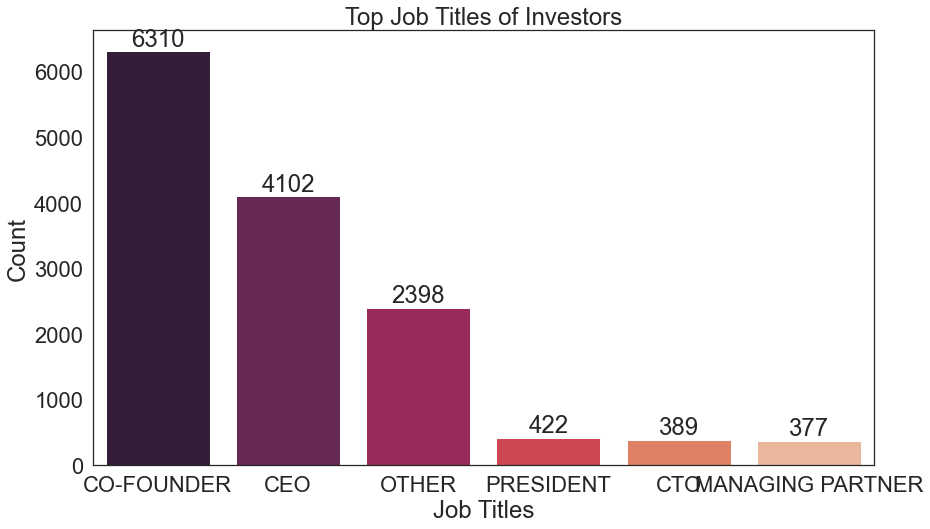

In [481]:
plt.figure(figsize=(14,8))
bar_sector = sns.barplot(x =title_count.index, y = title_count.values,palette="rocket")
sns.set_style("white")
plt.title('Top Job Titles of Investors')
plt.xlabel('Job Titles')
plt.ylabel('Count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
for j,i in enumerate(bar_sector.patches):
    height = i.get_height()
    bar_sector.text(i.get_x() + i.get_width()/2, height + 5, title_count[j], ha='center', va='bottom')
plt.savefig('Job Titles.png',bbox_inches='tight')

# Distribution of companies by founding year

In [482]:
df['Founded Year']

0           Jun 2009
1               2008
2               2010
3       Nov 28, 2008
4               2014
            ...     
9995    May 29, 2012
9996            2009
9997    Apr 28, 2008
9998     Jan 1, 2014
9999            2012
Name: Founded Year, Length: 9935, dtype: object

In [483]:
founded_y = []
founded1 =[]
for i in df['Founded Year']:
    if isinstance(i, float):
        i= ' '
    i = i.split(' ')
    founded_y.append(i)

In [484]:
for i in founded_y:
    if(len(i)==3):
        founded1.append(i[2])
    elif(len(i)==2):
        founded1.append(i[1])
    elif(len(i)==1):
        founded1.append(i[0])

In [485]:
year_counts1 = year_counts[0][:-1]
year_counts1_c = year_counts[1][:-1]

year_counts1 = year_counts1[::-1]
year_counts1_c = [int(i) for i in year_counts1_c]
year_counts1_c = year_counts1_c[::-1]

year_counts1 = year_counts1[0:30]
year_counts1_c = year_counts1_c[0:30]

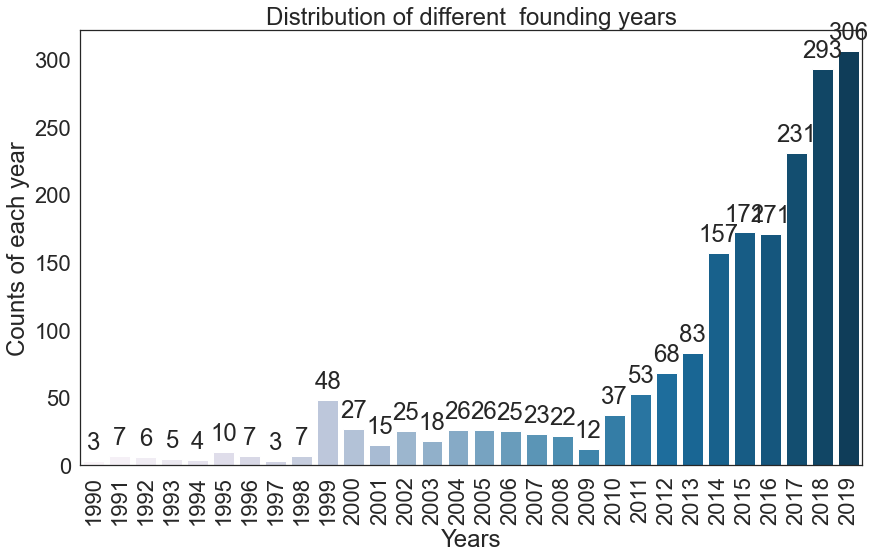

In [486]:
plt.figure(figsize=(14,8))

bar_year = sns.barplot(x =year_counts1, y = year_counts1_c,palette="PuBu")
plt.title('Distribution of different  founding years')
plt.xlabel('Years')
plt.ylabel('Counts of each year')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


for i,j in zip(bar_year.patches,year_counts1_c[::-1]):
    height = i.get_height()
    bar_year.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.savefig("Founding_Years",bbox_inches='tight')
df['Founded Year'] = founded1

# Acquisition Statuses

In [487]:
df['Acquisition Status'].value_counts()

No Participation    7065
Acquisition         1544
Merger              1326
Name: Acquisition Status, dtype: int64

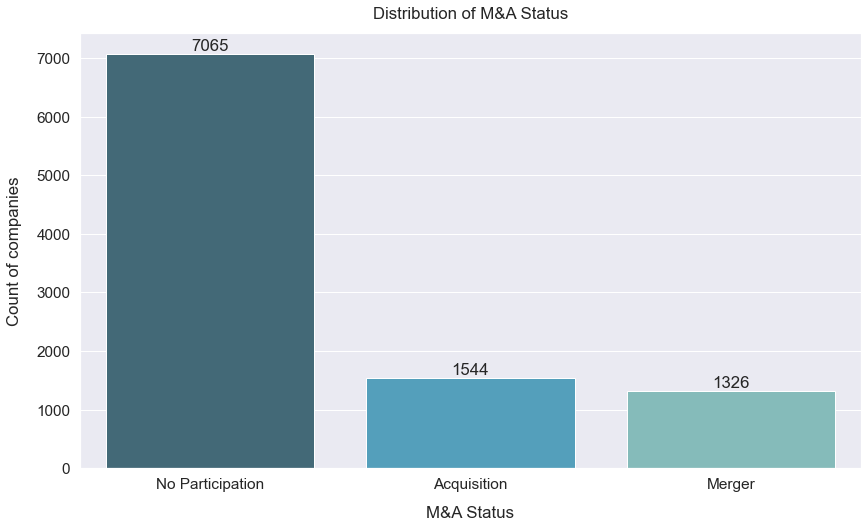

In [488]:
#count of all companies with the given 3 acquisition statuses
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Acquisition Status'].value_counts()

bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="GnBu_d")
sns.set_style("white")
plt.xlabel("M&A Status", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Distribution of M&A Status", y=1.02);

locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
for i,j in zip(bar_plot.patches,acqstat.values):
    height = i.get_height()
    bar_plot.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.savefig('acq_status.png',bbox_inches='tight')

# Funding Status

In [489]:
df['Funding Status'].value_counts()

Early Stage Venture    4972
Seed                   1636
M&A                    1326
Late Stage Venture      978
IPO                     745
Private Equity          278
Name: Funding Status, dtype: int64

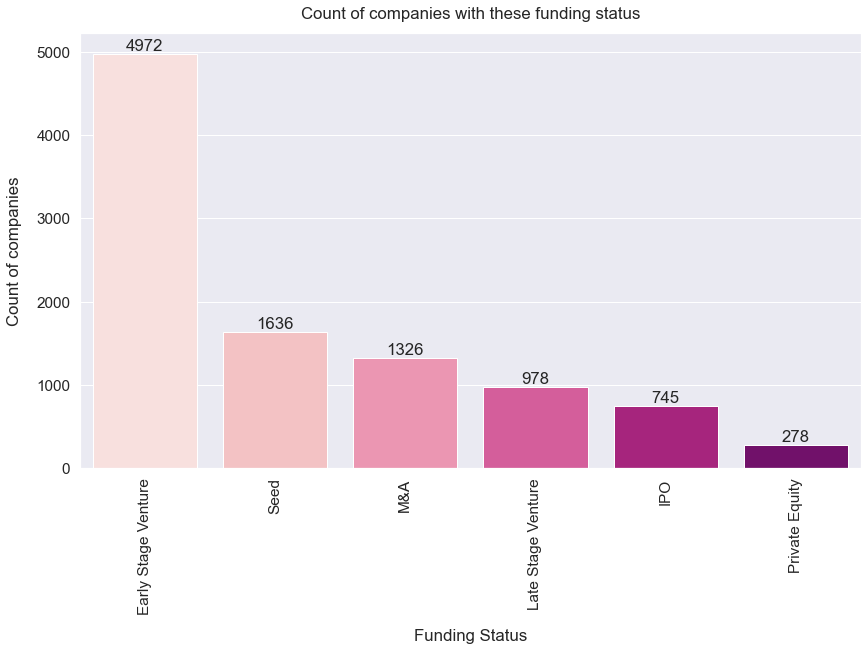

In [490]:
#count of all companies with the given funding statuses

plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Funding Status'].value_counts()

bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Funding Status", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with these funding status", y=1.02);

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for i,j in zip(bar_plot.patches,acqstat.values):
    height = i.get_height()
    bar_plot.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.show()

# Relationship between Funding Amount and IPO status

In [491]:
df['IPO status'].value_counts()

Private     9052
Public       794
Delisted      89
Name: IPO status, dtype: int64

In [492]:
df['Funding Amount'].unique()

[100M+, $10M to 100M, $1M to $10M, Less than $1M]
Categories (4, object): [Less than $1M < $1M to $10M < $10M to 100M < 100M+]

In [493]:
import plotly.express as px
fig = px.box(df, x="IPO status", y="Funding Amount", hover_data= ["IPO status"])
fig.show()

# Exit Year

In [494]:
df['Exit Date']

0       Sep 12, 2019
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
9995     Feb 3, 2020
9996             NaN
9997             NaN
9998             NaN
9999     Aug 1, 2016
Name: Exit Date, Length: 9935, dtype: object

In [495]:
founded_y = []
founded1 =[]
df['Exit Date'].fillna(" ", inplace = True)
for i in df['Exit Date']:
    i = i.split(' ')
    founded_y.append(i)

In [496]:
founded_y

[['Sep', '12,', '2019'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Aug', '8,', '2016'],
 ['', ''],
 ['Apr', '18,', '2017'],
 ['Oct', '2,', '2018'],
 ['Aug', '3,', '2007'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Aug', '1,', '2012'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['May', '14,', '2015'],
 ['', ''],
 ['Feb', '22,', '2017'],
 ['Jun', '10,', '2016'],
 ['Aug', '23,', '2017'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Jan', '23,', '2020'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Jun', '30,', '2006'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Dec', '15,', '2015'],
 ['Mar', '7,', '2014'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Dec', '12,', '2019'],
 ['', ''],
 ['', ''],
 ['Jan', '24,', '2020'],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['Aug', '2,', '2018'],
 ['May', '6,', '2014'],
 ['', ''],
 ['Feb', '5,', '2018'],
 ['Apr', '14,', '2016'],
 ['Nov', '17,', '2014'],
 ['', ''],
 ['', ''],
 ['Jan', '29,', '2010'],
 ['', ''],
 ['Jan', '9,', '2008'],
 ['', ''],
 ['',

In [497]:
for i in founded_y:
    if(len(i)==3):
        founded1.append(i[2])
    elif(len(i)==2):
        founded1.append(i[1])
    elif(len(i)==1):
        founded1.append(i[0])

In [498]:
founded1

['2019',
 '',
 '',
 '',
 '',
 '',
 '2016',
 '',
 '2017',
 '2018',
 '2007',
 '',
 '',
 '',
 '2012',
 '',
 '',
 '',
 '2015',
 '',
 '2017',
 '2016',
 '2017',
 '',
 '',
 '',
 '',
 '',
 '2020',
 '',
 '',
 '',
 '',
 '2006',
 '',
 '',
 '',
 '2015',
 '2014',
 '',
 '',
 '',
 '2019',
 '',
 '',
 '2020',
 '',
 '',
 '',
 '',
 '2018',
 '2014',
 '',
 '2018',
 '2016',
 '2014',
 '',
 '',
 '2010',
 '',
 '2008',
 '',
 '',
 '',
 '2014',
 '',
 '',
 '2018',
 '2014',
 '1999',
 '',
 '',
 '',
 '2018',
 '',
 '',
 '',
 '1978',
 '',
 '2015',
 '2011',
 '',
 '',
 '2004',
 '',
 '',
 '2014',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2014',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2017',
 '',
 '',
 '',
 '',
 '',
 '',
 '2011',
 '2009',
 '',
 '',
 '2014',
 '',
 '2017',
 '2019',
 '',
 '',
 '2017',
 '',
 '',
 '',
 '',
 '',
 '2017',
 '',
 '2015',
 '2012',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2017',
 '',
 '',
 '',
 '',
 '',
 '2015',
 '',
 '',
 '',
 '',
 '',
 '',
 '2018',
 '',
 '',
 '',
 '2014',
 '2006',
 '',
 '',
 '',
 '',
 '',

In [499]:
year_counts = np.unique(founded1,return_counts=True)
year_counts

(array(['', '1909', '1923', '1954', '1962', '1971', '1972', '1978', '1979',
        '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
        '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
        '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
        '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
        '2020'], dtype='<U4'),
 array([7864,    1,    1,    1,    1,    1,    2,   31,    1,    1,    3,
           1,    5,    4,    3,    9,    1,    1,    2,    3,    7,    6,
           5,    4,   10,    7,    3,    7,   48,   27,   15,   25,   18,
          26,   26,   25,   23,   22,   12,   37,   53,   68,   83,  157,
         172,  171,  231,  293,  306,  112], dtype=int64))

In [500]:
year_counts1 = year_counts[0][:-1]
year_counts1_c = year_counts[1][:-1]

In [501]:
year_counts1 = year_counts1[::-1]
year_counts1_c = [int(i) for i in year_counts1_c]
year_counts1_c = year_counts1_c[::-1]

In [502]:
year_counts1 = year_counts1[0:30]
year_counts1_c = year_counts1_c[0:30]

In [503]:
year_counts1

array(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990'], dtype='<U4')

In [504]:
year_counts1_c

[306,
 293,
 231,
 171,
 172,
 157,
 83,
 68,
 53,
 37,
 12,
 22,
 23,
 25,
 26,
 26,
 18,
 25,
 15,
 27,
 48,
 7,
 3,
 7,
 10,
 4,
 5,
 6,
 7,
 3]

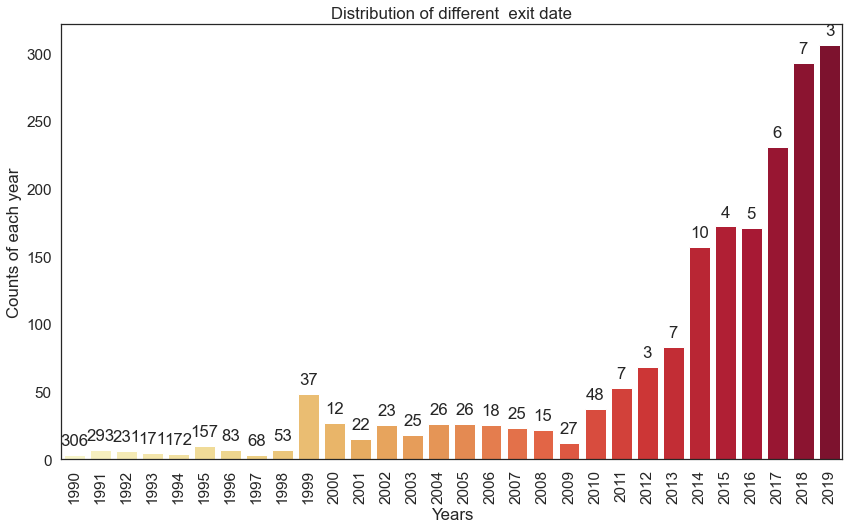

In [505]:
plt.figure(figsize=(14,8))
bar_year = sns.barplot(x =year_counts1, y = year_counts1_c,palette="YlOrRd")
sns.set_style("white")
plt.title('Distribution of different  exit date')
plt.xlabel('Years')
plt.ylabel('Counts of each year')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


for i,j in zip(bar_year.patches,year_counts1_c):
    height = i.get_height()
    bar_year.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.show()
df['Exit Date'] = founded1

# Number of Employees

In [506]:
df['Number of employees'].unique()

array(['500-5000', '100-500', '11-50', '50-100', '<10', '>5000'],
      dtype=object)

In [507]:
countries_cat_count = df['Number of employees'].value_counts()
countries_cat_count = countries_cat_count.sort_values(ascending = False)
countries_cat_count

11-50       4092
100-500     1961
50-100      1361
<10         1123
500-5000     944
>5000        454
Name: Number of employees, dtype: int64

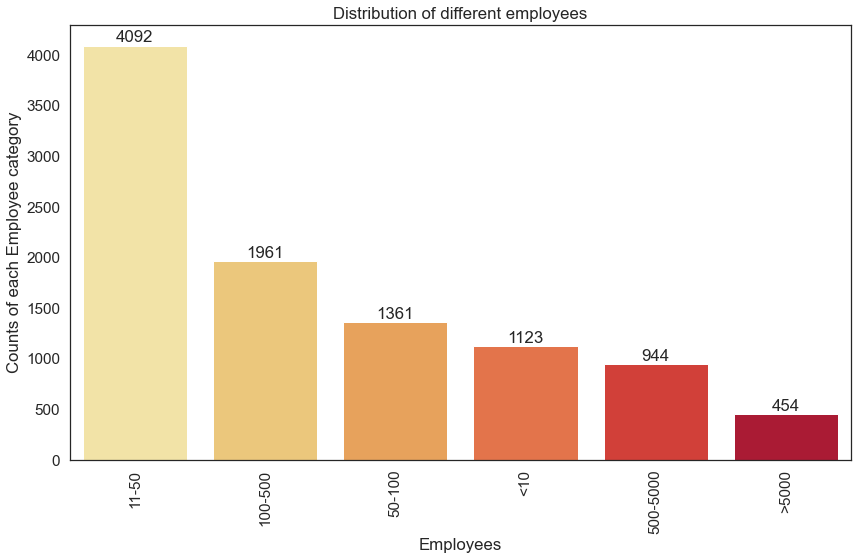

In [508]:
plt.figure(figsize=(14,8))
bar_countries = sns.barplot(x =countries_cat_count.index, y = countries_cat_count.values,palette="YlOrRd")
sns.set_style("white")
plt.title('Distribution of different employees')
plt.xlabel('Employees')
plt.ylabel('Counts of each Employee category')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for i,j in zip(bar_countries.patches,countries_cat_count.values):
    height = i.get_height()
    bar_countries.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.show()

# Estimated Revenue

In [509]:
countries_cat_count = df['Estimated Revenue'].value_counts()

In [510]:
countries_cat_count = countries_cat_count.sort_values(ascending = False)

In [511]:
countries_cat_count

$1M to $10M      3728
$1M - $10M       3075
$10M - $100M     1506
Less than $1M     836
$100M-$1B+        790
Name: Estimated Revenue, dtype: int64

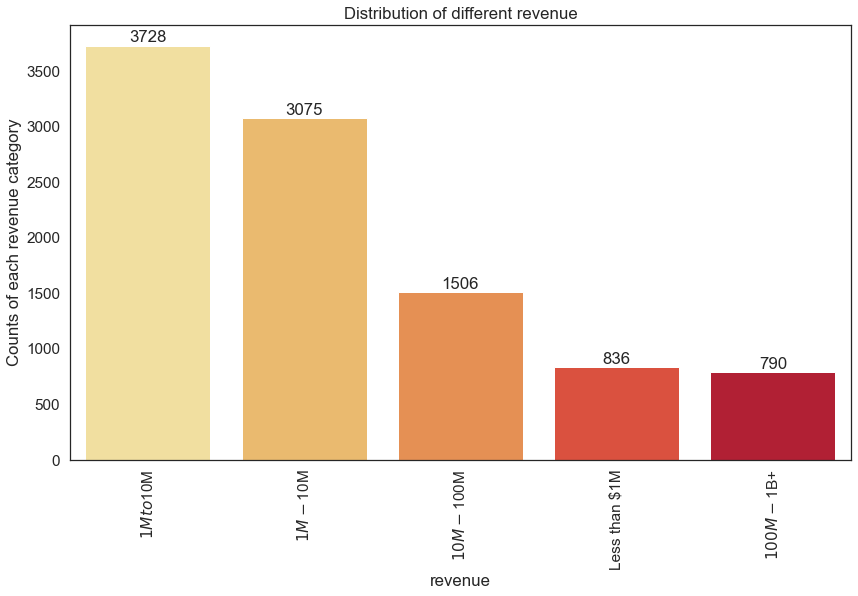

In [512]:
plt.figure(figsize=(14,8))
bar_countries = sns.barplot(x =countries_cat_count.index, y = countries_cat_count.values,palette="YlOrRd")
sns.set_style("white")
plt.title('Distribution of different revenue')
plt.xlabel('revenue')
plt.ylabel('Counts of each revenue category')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for i,j in zip(bar_countries.patches,countries_cat_count.values):
    height = i.get_height()
    bar_countries.text(i.get_x() + i.get_width()/2, height + 5, j, ha='center', va='bottom')
plt.show()

# Founders Data

In [513]:
df['Founders'].value_counts()

2      4512
1      2919
3-7    2504
Name: Founders, dtype: int64

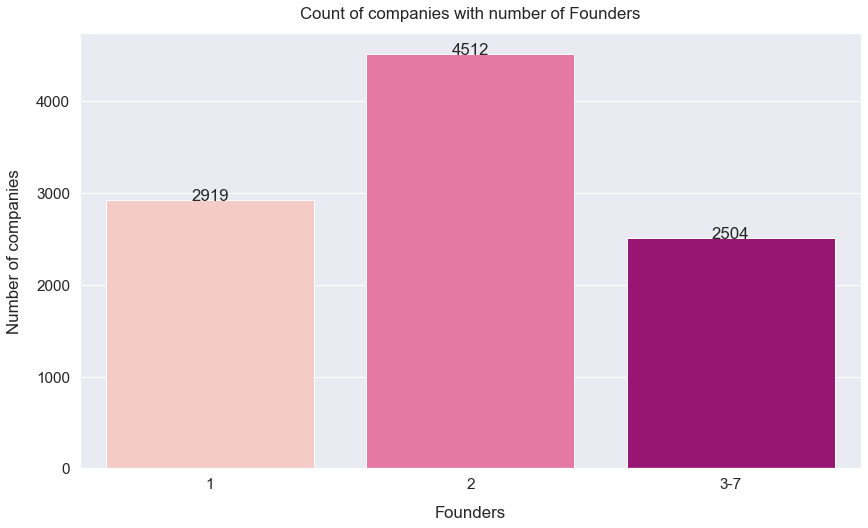

In [514]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Founders'].value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Founders", labelpad=14)
plt.ylabel("Number of companies", labelpad=14)
plt.title("Count of companies with number of Founders", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.savefig('Founders',bbox_inches='tight')

In [515]:
df['Funding Rounds'].value_counts()

2-4     5475
5-13    2327
1       2133
Name: Funding Rounds, dtype: int64

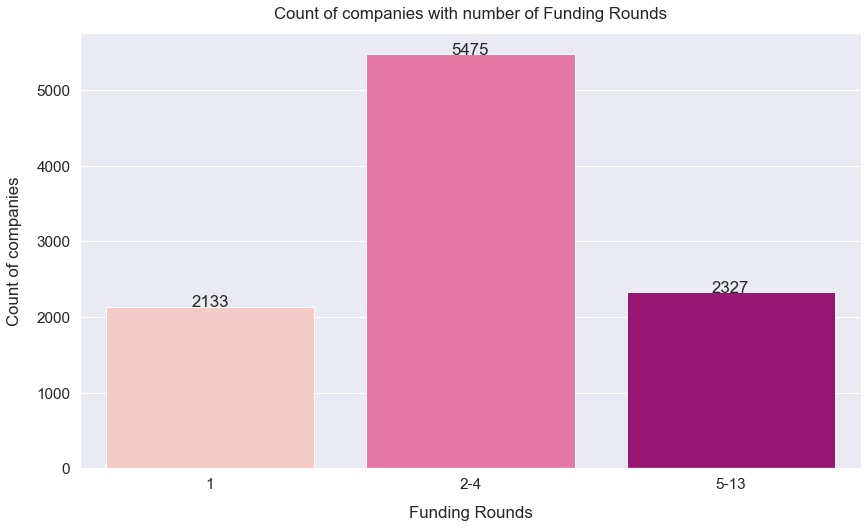

In [516]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Funding Rounds'].value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Funding Rounds", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with number of Funding Rounds", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.show()

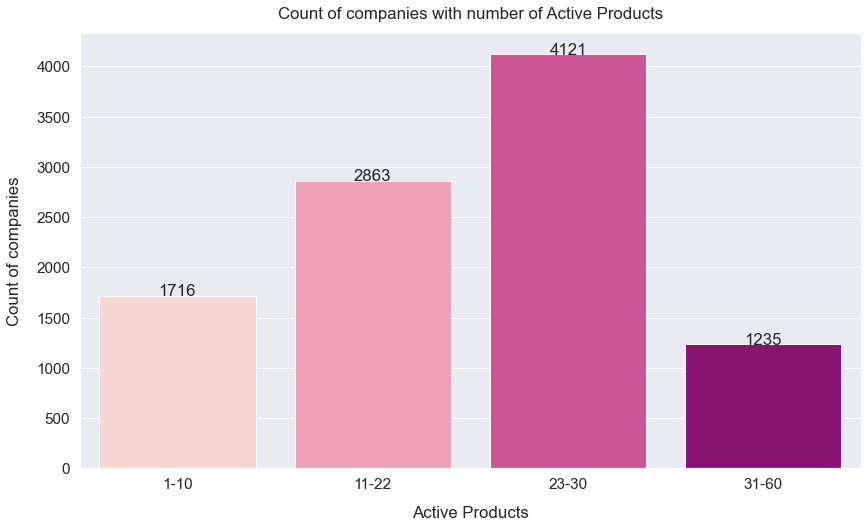

In [517]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Active Products'].value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Active Products", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with number of Active Products", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.savefig("active_products", bbox_inches='tight')

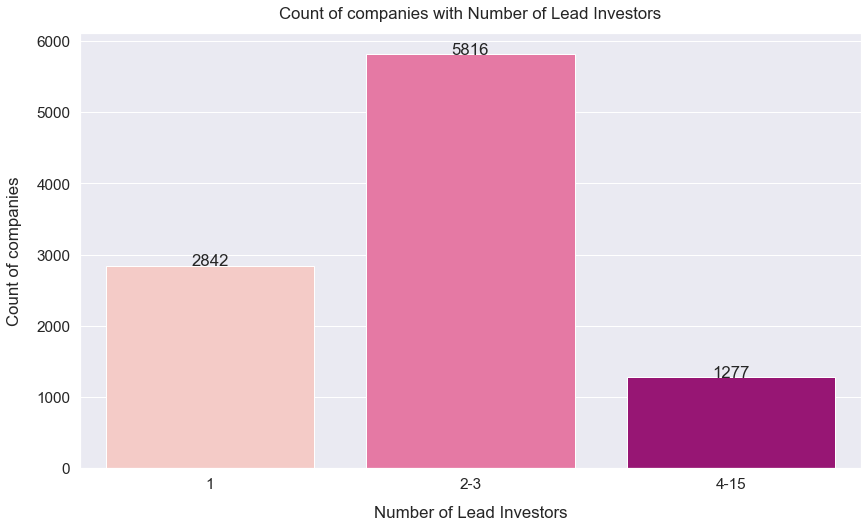

In [518]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Nunmber of Lead Investors'] .value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Number of Lead Investors", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with Number of Lead Investors", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.show()

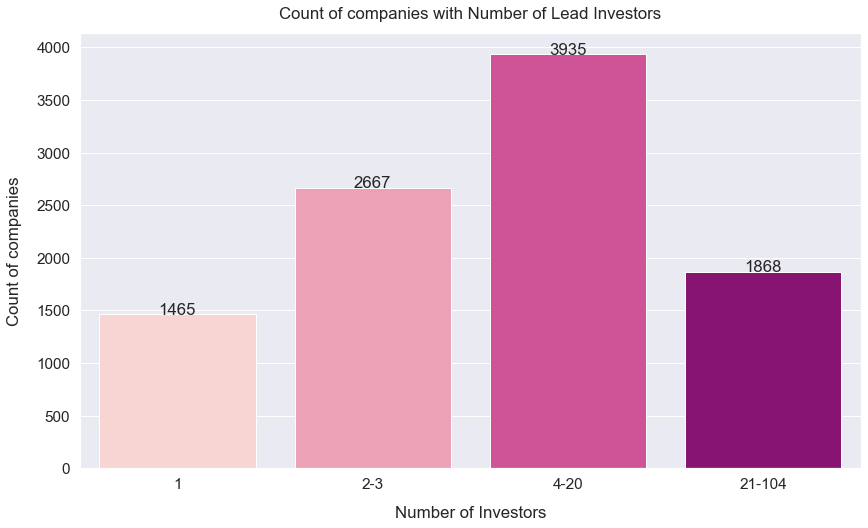

In [519]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Nmber of Investors'].value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Number of Investors", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with Number of Lead Investors", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.show()

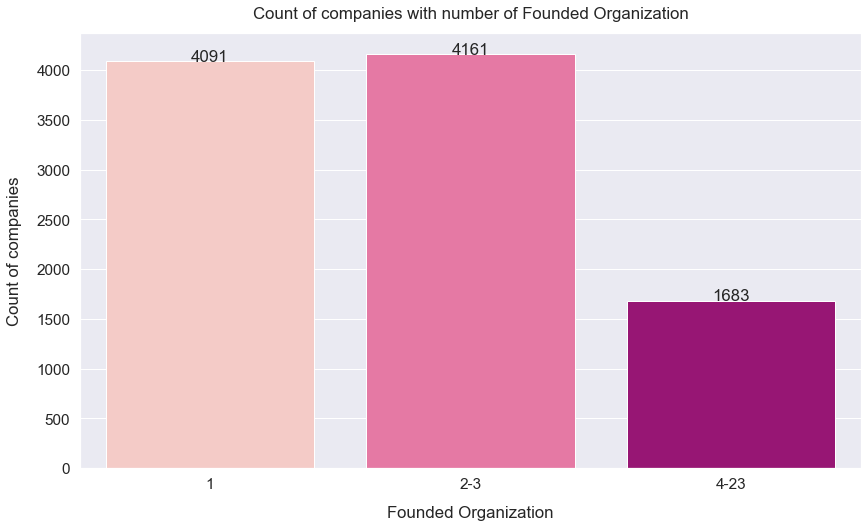

In [520]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Founded Organization'].value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Founded Organization", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with number of Founded Organization", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.show()

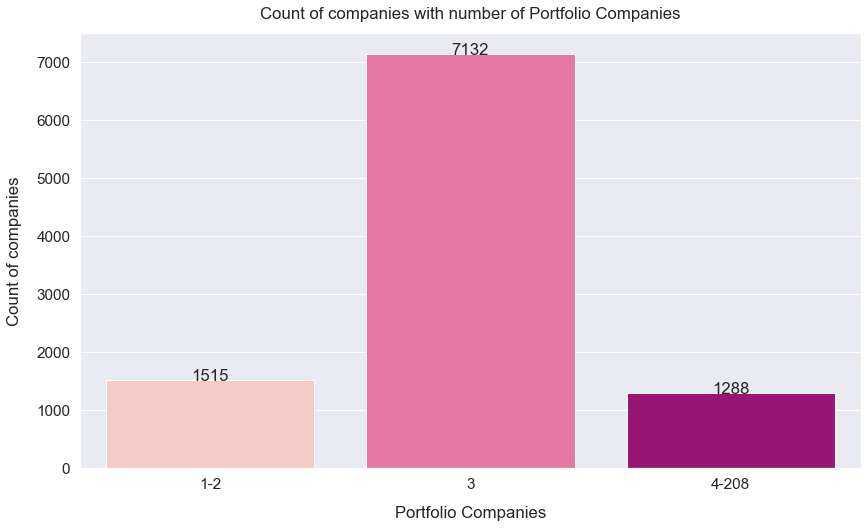

In [521]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.4)
acqstat = df['Portfolio Companies'].value_counts()
acqstat
bar_plot = sns.barplot(x =acqstat.index, y = acqstat.values,palette="RdPu")
sns.set_style("white")
plt.xlabel("Portfolio Companies", labelpad=14)
plt.ylabel("Count of companies", labelpad=14)
plt.title("Count of companies with number of Portfolio Companies", y=1.02);
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2., height + 0.1, acqstat[i],ha="center")
plt.show()

# Model Building

Predicting whether a company will take part in Merger or Acquisition Process

In [522]:
df.isnull().sum()

Unnamed: 0                      0
Type                            0
Headquaters                     0
Founded Year                    0
Exit Date                       0
Estimated Revenue               0
Founders                        0
Number of employees             0
Funding Rounds                  0
Funding Status                  0
Active Products                 0
Funding Amount                  0
Nunmber of Lead Investors       0
Nmber of Investors              0
Acquired Price               9501
Acquisitions                 7924
Acquisition Status              0
Acquired By                  8607
IPO status                      0
Job Title                       0
Founded Organization            0
Portfolio Companies             0
dtype: int64

In [523]:
data_model_df = df

In [524]:
df1 = data_model_df['Type'].str.get_dummies(sep=',')
df11 = pd.DataFrame(df1)
df2 = data_model_df['Job Title'].str.get_dummies(sep='&')
df22 = pd.DataFrame(df2)

In [525]:
data_model_df = data_model_df.join(df11)
data_model_df = data_model_df.join(df22)

In [526]:
#number of categories in each feature
for feature in data_model_df:
    print('The feature is {} and number of categories are {}'.format(feature, len(data_model_df[feature].unique())))

The feature is Unnamed: 0 and number of categories are 9935
The feature is Type and number of categories are 548
The feature is Headquaters and number of categories are 6
The feature is Founded Year and number of categories are 185
The feature is Exit Date and number of categories are 50
The feature is Estimated Revenue and number of categories are 5
The feature is Founders and number of categories are 3
The feature is Number of employees and number of categories are 6
The feature is Funding Rounds and number of categories are 3
The feature is Funding Status and number of categories are 6
The feature is Active Products and number of categories are 4
The feature is Funding Amount and number of categories are 4
The feature is Nunmber of Lead Investors and number of categories are 3
The feature is Nmber of Investors and number of categories are 4
The feature is Acquired Price and number of categories are 279
The feature is Acquisitions and number of categories are 60
The feature is Acquis

In [527]:
data_model_df = pd.get_dummies(data_model_df, columns=['Headquaters','Estimated Revenue','Founders',
                                   'Number of employees','Funding Rounds','Funding Status','Active Products','Funding Amount',
                                   'Nunmber of Lead Investors','Nmber of Investors','IPO status','Founded Organization',
                                    'Portfolio Companies','Founded Year','Exit Date'])
data_model_df.head()

Unnamed: 0                  Type Acquired Price Acquisitions  \
0           0   Enterprise Software            NaN            5   
1           1                 Other            NaN          NaN   
2           2     Marketing, Retail            NaN            9   
3           3    SaaS, Social Media            NaN           12   
4           4                 Other            NaN          NaN   

  Acquisition Status Acquired By       Job Title   Big Data   Consulting  \
0        Acquisition         NaN  CO-FOUNDER&CEO          0            0   
1   No Participation         NaN  CO-FOUNDER&CEO          0            0   
2        Acquisition         NaN      CO-FOUNDER          0            0   
3        Acquisition         NaN  CEO&CO-FOUNDER          0            0   
4   No Participation         NaN           OTHER          0            0   

    E-Commerce  ...  Exit Date_2011  Exit Date_2012  Exit Date_2013  \
0            0  ...               0               0               0   
1            0  ...               0               0               0   
2            0  ...               0               0               0   
3            0  ...               0               0               0   
4            0  ...               0               0               0   

   Exit Date_2014  Exit Date_2015  Exit Date_2016  Exit Date_2017  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Exit Date_2018  Exit Date_2019  Exit Date_2020  
0               0               1               0  
1               0               0               0  
2               0               0               0  
3               0               0               0  
4               0               0               0  

[5 rows x 327 columns]

# Down Sample 1500 samples of "Did Not Participate" due to imbalanced Data¶

Down Sampling

In [528]:
data_model_df['Acquisition Status'].unique()

array(['Acquisition', 'No Participation', 'Merger'], dtype=object)

In [529]:
test_data = data_model_df

In [530]:
df_majority = data_model_df[data_model_df['Acquisition Status']=='No Participation']
df_min1 = data_model_df[data_model_df['Acquisition Status']=='Acquisition']
df_min2 = data_model_df[data_model_df['Acquisition Status']=='Merger']


df_minority = data_model_df.drop(df_majority.index)
df_minority

In [531]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=1500,     # to match minority class
                                 random_state=123) # reproducible results

In [532]:
df_majority_downsampled

Unnamed: 0                                    Type Acquired Price  \
4960        4960   Financial Services, FinTech, Payments            NaN   
4802        4802    Finance, Financial Services, FinTech            NaN   
2017        2017                                   Other            NaN   
5618        5618           Health Care, Machine Learning            NaN   
7323        7323                          Medical Device            NaN   
...          ...                                     ...            ...   
7509        7509                  Information Technology            NaN   
1663        1663                                   Other            NaN   
2681        2681                      E-Commerce, Mobile            NaN   
6854        6854                                Internet            NaN   
2848        2848                    E-Commerce, Payments            NaN   

     Acquisitions Acquisition Status Acquired By             Job Title  \
4960          NaN   No Participation         NaN  CO-FOUNDER&PRESIDENT   
4802          NaN   No Participation         NaN        CO-FOUNDER&CEO   
2017          NaN   No Participation         NaN        CO-FOUNDER&CEO   
5618          NaN   No Participation         NaN        CO-FOUNDER&CTO   
7323          NaN   No Participation         NaN        CEO&CO-FOUNDER   
...           ...                ...         ...                   ...   
7509          NaN   No Participation         NaN                 OTHER   
1663          NaN   No Participation         NaN                 OTHER   
2681          NaN   No Participation         NaN            CO-FOUNDER   
6854          NaN   No Participation         NaN            CO-FOUNDER   
2848          NaN   No Participation         NaN        CO-FOUNDER&CEO   

       Big Data   Consulting   E-Commerce  ...  Exit Date_2011  \
4960          0            0            0  ...               0   
4802          0            0            0  ...               0   
2017          0            0            0  ...               0   
5618          0            0            0  ...               0   
7323          0            0            0  ...               0   
...         ...          ...          ...  ...             ...   
7509          0            0            0  ...               0   
1663          0            0            0  ...               0   
2681          0            0            1  ...               0   
6854          0            0            0  ...               0   
2848          0            0            1  ...               0   

      Exit Date_2012  Exit Date_2013  Exit Date_2014  Exit Date_2015  \
4960               0               0               0               0   
4802               0               0               0               0   
2017               0               0               0               0   
5618               0               0               0               0   
7323               0               0               0               0   
...              ...             ...             ...             ...   
7509               0               0               0               0   
1663               0               0               0               0   
2681               0               0               0               0   
6854               0               0               0               0   
2848               0               0               0               0   

      Exit Date_2016  Exit Date_2017  Exit Date_2018  Exit Date_2019  \
4960               0               0               0               0   
4802               0               0               0               0   
2017               0               0               0               0   
5618               0               0               0               0   
7323               0               0               0               0   
...              ...             ...             ...             ...   
7509               0               0               0  

In [533]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_min2,df_min1,df_majority_downsampled])
 
# Display new class counts
df_downsampled['Acquisition Status'].value_counts()

Acquisition         1544
No Participation    1500
Merger              1326
Name: Acquisition Status, dtype: int64

In [534]:
df_downsampled

Unnamed: 0                             Type  Acquired Price  \
6              6                        Marketing  $1,500,000,000   
8              8                  Marketing, SaaS    $850,000,000   
14            14                            Other    $175,000,000   
18            18                     Social Media     $50,000,000   
20            20   Enterprise Software, Marketing    $310,000,000   
...          ...                              ...             ...   
7509        7509           Information Technology             NaN   
1663        1663                            Other             NaN   
2681        2681               E-Commerce, Mobile             NaN   
6854        6854                         Internet             NaN   
2848        2848             E-Commerce, Payments             NaN   

     Acquisitions Acquisition Status             Acquired By       Job Title  \
6              18             Merger   Dentsu Aegis Network            OTHER   
8             NaN             Merger                 Oracle   CO-FOUNDER&CEO   
14              1             Merger    Turner Broadcasting            OTHER   
18            NaN             Merger         Brand Networks            OTHER   
20            NaN             Merger                 Amobee   CO-FOUNDER&CEO   
...           ...                ...                     ...             ...   
7509          NaN   No Participation                     NaN           OTHER   
1663          NaN   No Participation                     NaN           OTHER   
2681          NaN   No Participation                     NaN      CO-FOUNDER   
6854          NaN   No Participation                     NaN      CO-FOUNDER   
2848          NaN   No Participation                     NaN  CO-FOUNDER&CEO   

       Big Data   Consulting   E-Commerce  ...  Exit Date_2011  \
6             0            0            0  ...               0   
8             0            0            0  ...               0   
14            0            0            0  ...               0   
18            0            0            0  ...               0   
20            0            0            0  ...               0   
...         ...          ...          ...  ...             ...   
7509          0            0            0  ...               0   
1663          0            0            0  ...               0   
2681          0            0            1  ...               0   
6854          0            0            0  ...               0   
2848          0            0            1  ...               0   

      Exit Date_2012  Exit Date_2013  Exit Date_2014  Exit Date_2015  \
6                  0               0               0               0   
8                  0               0               0               0   
14                 1               0               0               0   
18                 0               0               0               1   
20                 0               0               0               0   
...              ...             ...             ...             ...   
7509               0               0               0               0   
1663               0               0               0               0   
2681               0               0               0               0   
6854               0               0               0               0   
2848               0               0               0               0   

      Exit Date_2016  Exit Date_2017  Exit Date_2018  Exit Date_2019  \
6                  1               0               0               0   
8                  0               1               0               0   
14                 0               0               0               0   
18                 0               0               0               0   
20                 0               1               0               0   
...              ...             ...             ...             ...   
7509               0               0               0  

In [535]:
test_data.shape

(9935, 327)

In [536]:
Acquired_Status = df_downsampled['Acquisition Status']
Acquired_price = df_downsampled['Acquired Price']
Acquired_By = df_downsampled['Acquired By']

In [537]:
df_downsampled = df_downsampled.drop(['Acquired Price'],axis = 1)
df_downsampled = df_downsampled.drop(['Acquired By'],axis = 1)
df_downsampled = df_downsampled.drop(['Acquisition Status'],axis = 1)
df_downsampled = df_downsampled.drop(['Acquisitions'],axis = 1)
df_downsampled = df_downsampled.drop(['Type'],axis = 1)
df_downsampled = df_downsampled.drop(['Job Title'],axis = 1)
df_downsampled = df_downsampled.drop(['Unnamed: 0'],axis=1)

In [538]:
df_downsampled

Big Data   Consulting   E-Commerce   Education   Enterprise Software  \
6             0            0            0           0                     0   
8             0            0            0           0                     0   
14            0            0            0           0                     0   
18            0            0            0           0                     0   
20            0            0            0           0                     1   
...         ...          ...          ...         ...                   ...   
7509          0            0            0           0                     0   
1663          0            0            0           0                     0   
2681          0            0            1           0                     0   
6854          0            0            0           0                     0   
2848          0            0            1           0                     0   

       Fashion   FinTech   Finance   Financial Services   Health Care  ...  \
6            0         0         0                    0             0  ...   
8            0         0         0                    0             0  ...   
14           0         0         0                    0             0  ...   
18           0         0         0                    0             0  ...   
20           0         0         0                    0             0  ...   
...        ...       ...       ...                  ...           ...  ...   
7509         0         0         0                    0             0  ...   
1663         0         0         0                    0             0  ...   
2681         0         0         0                    0             0  ...   
6854         0         0         0                    0             0  ...   
2848         0         0         0                    0             0  ...   

      Exit Date_2011  Exit Date_2012  Exit Date_2013  Exit Date_2014  \
6                  0               0               0               0   
8                  0               0               0               0   
14                 0               1               0               0   
18                 0               0               0               0   
20                 0               0               0               0   
...              ...             ...             ...             ...   
7509               0               0               0               0   
1663               0               0               0               0   
2681               0               0               0               0   
6854               0               0               0               0   
2848               0               0               0               0   

      Exit Date_2015  Exit Date_2016  Exit Date_2017  Exit Date_2018  \
6                  0               1               0               0   
8                  0               0               1               0   
14                 0               0               0               0   
18                 1               0               0               0   
20                 0               0               1               0   
...              ...             ...             ...             ...   
7509               0               0               0               0   
1663               0               0               0               0   
2681               0               0               0               0   
6854               0               0               0               0   
2848               0               0               0               0   

      Exit Date_2019  Exit Date_2020  
6                  0               0  
8                  0               0  
14                 0               0  
18                 0               0  
20                 0               0  
...              ...             ...  
7509               0               0  
1663               0               0  
2681               0               0  
6

In [539]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.metrics import average_precision_score
from sklearn.ensemble import AdaBoostClassifier as ab
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier

from sklearn.linear_model import SGDClassifier as sg
import matplotlib.pyplot as plt
import numpy as np

In [540]:
X_train, X_test, y_train, y_test = train_test_split(df_downsampled, Acquired_Status, test_size=0.33, random_state=42)

In [541]:
y_train.value_counts()

Acquisition         1033
No Participation    1026
Merger               868
Name: Acquisition Status, dtype: int64

In [542]:
y_test.value_counts()

Acquisition         511
No Participation    474
Merger              458
Name: Acquisition Status, dtype: int64

# Naive Bayes, KNN, Gradient Boosting , Ada Boost, Decision Tree

In [543]:
model_name=['naive_bayes','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier','LogisticRegression']
models_list= [NB(),RF(),KNN(),GB(),ab(),dt(),LR(max_iter=600)]
for i, j in zip(model_name, models_list):
    scores = cross_val_score(j, X_train, y_train, cv=5)
    
    print(i+"--"+ "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

naive_bayes--Accuracy: 0.69 (+/- 0.01)
RandomForestClassifier--Accuracy: 0.82 (+/- 0.03)
KNeighborsClassifier--Accuracy: 0.77 (+/- 0.02)
GradientBoostingClassifier--Accuracy: 0.82 (+/- 0.02)
AdaBoostClassifier--Accuracy: 0.78 (+/- 0.09)
DecisionTreeClassifier--Accuracy: 0.76 (+/- 0.02)
LogisticRegression--Accuracy: 0.83 (+/- 0.02)


# Graph of Logistic Regression

C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'No Participation'




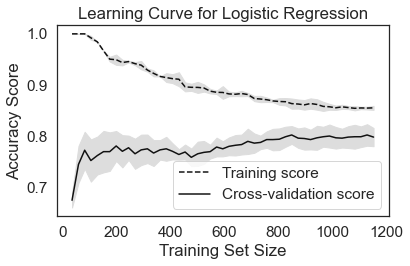

In [544]:
train_sizes, train_scores, test_scores = learning_curve(LR(max_iter = 1000), 
                                                        X_test, 
                                                        y_test,
                                                        cv = 5,
                                                       
                                                        scoring='accuracy',
                                                        
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig('logistic_reg.png', bbox_inches='tight')

# Graph for Naive Bayes

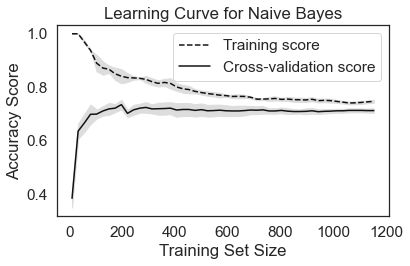

In [545]:
train_sizes, train_scores, test_scores = learning_curve(NB(), 
                                                        X_test, 
                                                        y_test,
                                                        cv = 5,
                                                       
                                                        scoring='accuracy',
                                                        
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for Naive Bayes")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig("NB.png",bbox_inches='tight')

# Decision Tree Learning Curve

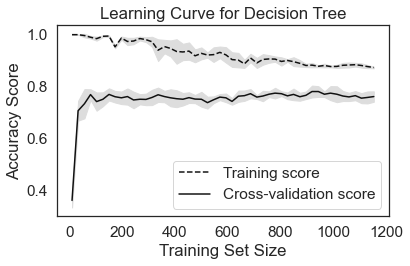

In [546]:
train_sizes, train_scores, test_scores = learning_curve(dt(criterion = 'entropy' ,max_depth = 10), 
                                                        X_test, 
                                                        y_test,
                                                        cv = 5,
                                                       
                                                        scoring='accuracy',
                                                        
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig("DT.png",bbox_inches='tight')

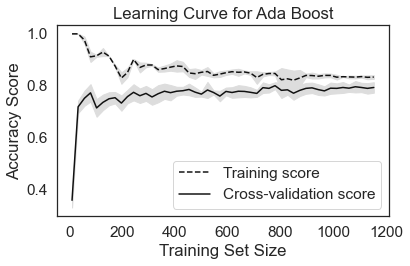

In [547]:
train_sizes, train_scores, test_scores = learning_curve(ab(), 
                                                        X_test, 
                                                        y_test,
                                                        cv = 5,
                                                       
                                                        scoring='accuracy',
                                                        
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve for Ada Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig('AdaBoost.png', bbox_inches='tight')

In [548]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard'
)
voting_clf.fit(X_train, y_train)

C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [549]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression 0.817047817047817
RandomForestClassifier 0.8343728343728344
SVC 0.8260568260568261


C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier 0.8302148302148302


In [550]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8156618156618156


In [551]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)

In [552]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8339596856850017

In [553]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8205128205128205

In [554]:
bag_clf.oob_decision_function_

array([[0.58510638, 0.        , 0.41489362],
       [0.26815642, 0.        , 0.73184358],
       [0.40251572, 0.        , 0.59748428],
       ...,
       [0.26143791, 0.        , 0.73856209],
       [0.16489362, 0.        , 0.83510638],
       [0.        , 1.        , 0.        ]])

In [555]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8239778239778239

In [556]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

In [557]:
bag_clf.fit(X_train, y_train)
y_pred_r = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_r)

0.8177408177408177

In [558]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [559]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8073458073458073

# ROC Curve Decision Tree

In [560]:
X = df_downsampled
y = Acquired_Status

In [561]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [562]:
y_1 = label_binarize(Acquired_Status,classes=['No Participation', 'Acquisition', 'Merger'])
n_classes = y_1.shape[1]
print(n_classes)

3


In [563]:
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y_1, test_size=0.33, random_state=42)


classifier = OneVsRestClassifier(dt(criterion = 'entropy' ,max_depth = 15))

y_score = classifier.fit(X_train_roc,y_train_roc).predict(X_test_roc)

In [564]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [565]:
yu = np.unique(Acquired_Status)
for i,v in enumerate(yu):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [566]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

C:\Users\ParthM\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



<Figure size 432x288 with 0 Axes>

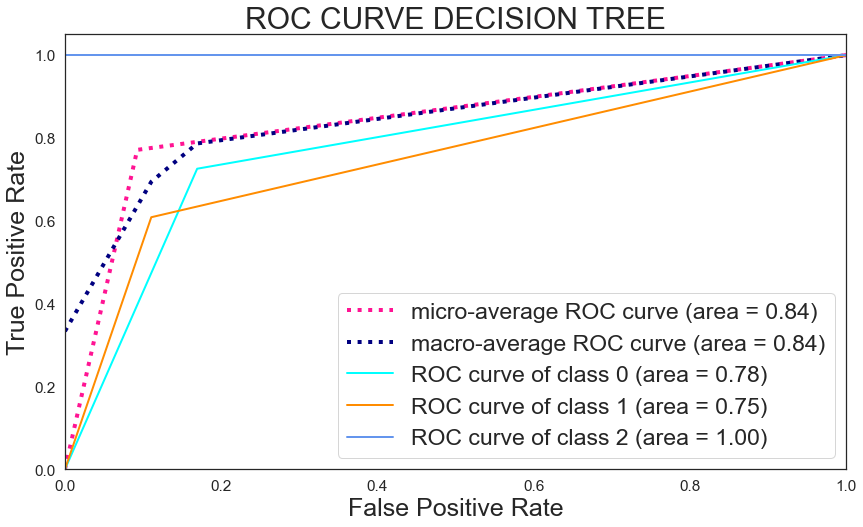

In [567]:
# Plot all ROC curves
plt.figure()
plt.figure(figsize=(14,8))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

#plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 25)
plt.ylabel('True Positive Rate',fontsize = 25)
plt.title('ROC CURVE DECISION TREE',fontsize = 30)
plt.legend(loc="lower right",prop={'size': 23})
plt.savefig("DT_ROC.png",bbox_inches='tight')

# Fitting and plotting the Decision Tree

In [568]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy' , random_state=42,max_depth = 25)
#scores = cross_val_score(X_train, y_train, cv=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test,y_test)
score

0.7747747747747747

from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
acc

# Confusion Matrix

In [569]:
import seaborn as sns
def print_ConfusionMatrix(actual, pred,score,algo):
    cm = confusion_matrix(actual, pred)
    sns.set(font_scale=2)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlOrRd');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(round(score,4))
    plt.title(all_sample_title)
    plt.savefig(algo, bbox_inches='tight')

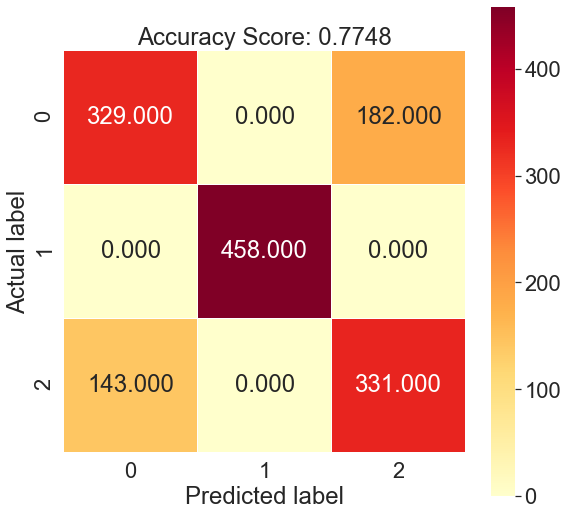

In [570]:
print_ConfusionMatrix(y_test, y_pred,score,'decision_tree.png')

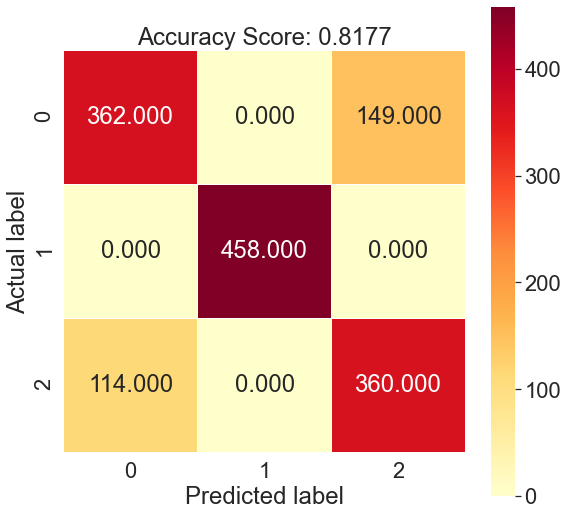

In [571]:
clf = LR(random_state=0,max_iter = 1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print_ConfusionMatrix(y_test, y_pred,score,"LR_CM.png")

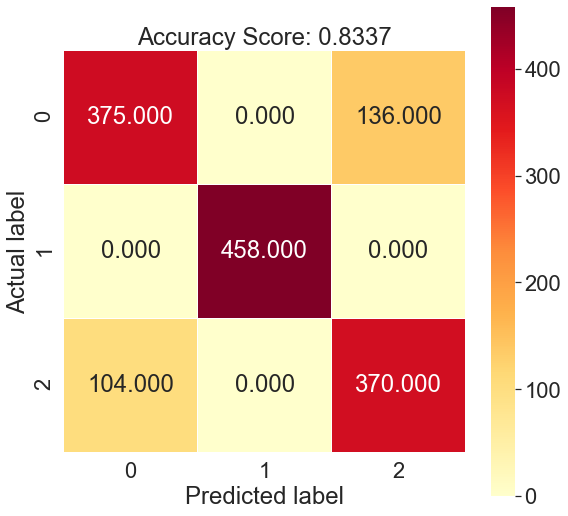

In [572]:
#Random Forest confusion matrix
clf = RF(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print_ConfusionMatrix(y_test, y_pred,score,"RF.png")

# Precision Recall DT

In [573]:
from sklearn.preprocessing import label_binarize

y = Acquired_Status
y = label_binarize(Acquired_Status, classes=['No Participation', 'Acquisition', 'Merger'])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
# print(df.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


classifier = OneVsRestClassifier(dt(criterion = 'entropy' ,max_depth = 15))
y_score = classifier.fit(X_train,y_train).predict(X_test)


In [574]:
from sklearn.metrics import precision_recall_curve


# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i], y_score[:,i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.70


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.70')

<Figure size 432x288 with 0 Axes>

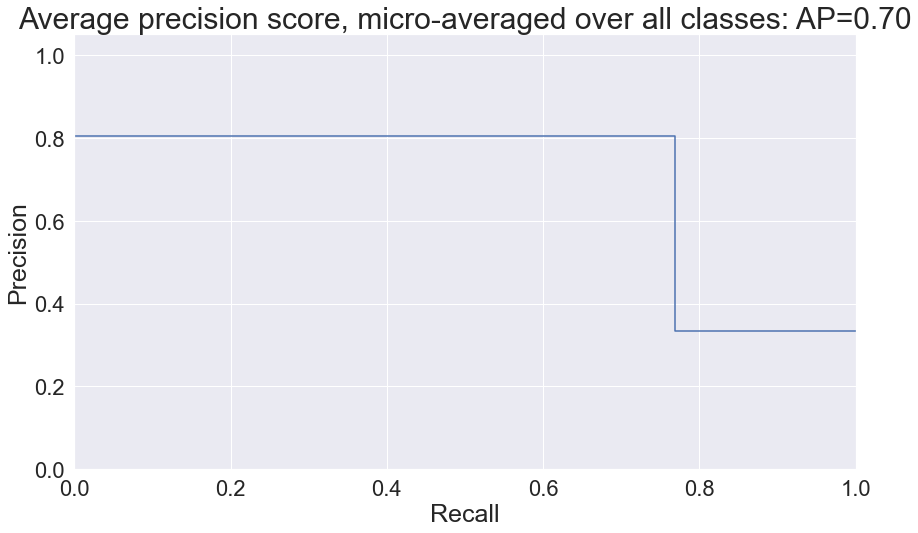

In [575]:
plt.figure()
plt.figure(figsize=(14,8))
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall',fontsize = 25)
plt.ylabel('Precision',fontsize = 25)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]),fontsize=30)

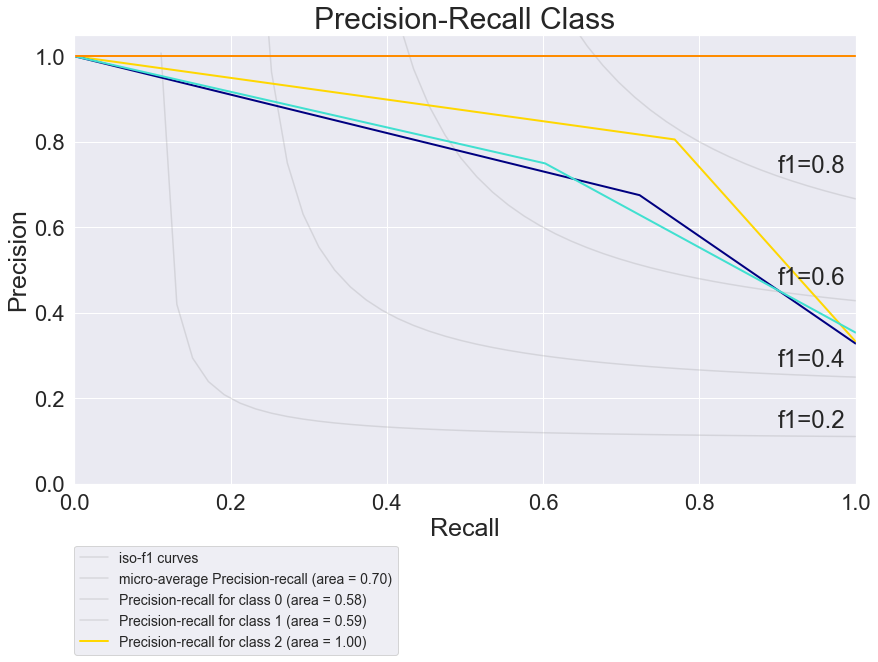

In [576]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(14,8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=25)
plt.ylabel('Precision',fontsize = 25)
plt.title('Precision-Recall Class',fontsize=30)
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.show()

# QUES 2 (Milestone 2 )
Predicting the best companies, a company should merge with for a profitable Merger

df2 = pd.read_excel('M&A_company.xlsx')

df2.head()

In [577]:
df

Unnamed: 0                                        Type    Headquaters  \
0              0                         Enterprise Software  North America   
1              1                                       Other  North America   
2              2                           Marketing, Retail  North America   
3              3                          SaaS, Social Media  North America   
4              4                                       Other  North America   
...          ...                                         ...            ...   
9995        9995   FinTech, Machine Learning, SaaS, Software  North America   
9996        9996                              SaaS, Software  North America   
9997        9997               Enterprise Software, Software  North America   
9998        9998                                    Software  North America   
9999        9999       Enterprise Software, Mobile, Software  North America   

     Founded Year Exit Date Estimated Revenue Founders Number of employees  \
0            2009      2019        $100M-$1B+      3-7            500-5000   
1            2008                  $1M - $10M        2             100-500   
2            2010                  $100M-$1B+        1             100-500   
3            2008                $10M - $100M      3-7            500-5000   
4            2014                  $1M - $10M        1             100-500   
...           ...       ...               ...      ...                 ...   
9995         2012      2020        $1M - $10M        2               11-50   
9996         2009                  $100M-$1B+        2             100-500   
9997         2008                $10M - $100M      3-7             100-500   
9998         2014                  $1M - $10M        1               11-50   
9999         2012      2016       $1M to $10M        2               11-50   

     Funding Rounds       Funding Status  ... Nunmber of Lead Investors  \
0              5-13                  IPO  ...                      4-15   
1              5-13   Late Stage Venture  ...                      4-15   
2               2-4       Private Equity  ...                       2-3   
3              5-13   Late Stage Venture  ...                      4-15   
4               2-4   Late Stage Venture  ...                         1   
...             ...                  ...  ...                       ...   
9995            2-4                  M&A  ...                       2-3   
9996           5-13   Late Stage Venture  ...                      4-15   
9997           5-13   Late Stage Venture  ...                       2-3   
9998            2-4  Early Stage Venture  ...                       2-3   
9999            2-4                  M&A  ...                       2-3   

     Nmber of Investors Acquired Price Acquisitions Acquisition Status  \
0                21-104            NaN            5        Acquisition   
1                  4-20            NaN          NaN   No Participation   
2                  4-20            NaN            9        Acquisition   
3                21-104            NaN           12        Acquisition   
4                21-104            NaN          NaN   No Participation   
...                 ...            ...          ...                ...   
9995             21-104            NaN          NaN             Merger   
9996             21-104            NaN            1        Acquisition   
9997             21-104            NaN            5        Acquisition   
9998               4-20            NaN          NaN   No Participation   
9999                2-3   $750,000,000            1             Merger   

       Acquired By IPO status       Job Title Founded Organization  \
0              NaN     Public  CO-FOUNDER&CEO                  2-3   
1              NaN    Private  CO-FOUNDER&CEO                 4-23   
2              NaN    Private      CO-FOUNDER                 4-23   
3              NaN    Private  CEO&CO-FOUNDER     

In [578]:
df_major_1 = df[df['Acquisition Status']=='Merger']
df_major_2 = df[df['Acquisition Status']=='Acquisition']

from sklearn.utils import resample
# Downsample majority class
df_major_downsampled = resample(df_major, 
                                 replace=True,    # sample without replacement
                                 n_samples=1500,     # to match minority class
                                 random_state=123) # reproducible results

df_major_downsampled

In [579]:
# Combine minority class with downsampled majority class
df_down = pd.concat([df_major_1,df_major_2])
 
# Display new class counts
df_down['Acquisition Status'].value_counts()

Acquisition    1544
Merger         1326
Name: Acquisition Status, dtype: int64

In [580]:
df_down

Unnamed: 0                                  Type    Headquaters  \
6              6                             Marketing  North America   
8              8                       Marketing, SaaS  North America   
14            14                                 Other  North America   
18            18                          Social Media  North America   
20            20        Enterprise Software, Marketing  North America   
...          ...                                   ...            ...   
9976        9976                 Mobile Apps, Software  North America   
9979        9979         Enterprise Software, Software  North America   
9991        9991   Mobile, Mobile Apps, SaaS, Software  North America   
9996        9996                        SaaS, Software  North America   
9997        9997         Enterprise Software, Software  North America   

     Founded Year Exit Date Estimated Revenue Founders Number of employees  \
6            1971      2016        $100M-$1B+        2            500-5000   
8            2010      2017        $100M-$1B+      3-7              50-100   
14           2007      2012        $100M-$1B+      3-7               11-50   
18           2010      2015       $1M to $10M        2              50-100   
20           2004      2017       $1M to $10M        1            500-5000   
...           ...       ...               ...      ...                 ...   
9976         2005      2015      $10M - $100M        1              50-100   
9979         2010                  $100M-$1B+      3-7            500-5000   
9991         2011                $10M - $100M      3-7             100-500   
9996         2009                  $100M-$1B+        2             100-500   
9997         2008                $10M - $100M      3-7             100-500   

     Funding Rounds      Funding Status  ... Nunmber of Lead Investors  \
6              5-13                 M&A  ...                         1   
8              5-13                 M&A  ...                       2-3   
14             5-13                 M&A  ...                       2-3   
18             5-13                 M&A  ...                      4-15   
20             5-13                 M&A  ...                      4-15   
...             ...                 ...  ...                       ...   
9976            2-4                 IPO  ...                       2-3   
9979           5-13  Late Stage Venture  ...                      4-15   
9991           5-13  Late Stage Venture  ...                      4-15   
9996           5-13  Late Stage Venture  ...                      4-15   
9997           5-13  Late Stage Venture  ...                       2-3   

     Nmber of Investors  Acquired Price Acquisitions Acquisition Status  \
6                     1  $1,500,000,000           18             Merger   
8                21-104    $850,000,000          NaN             Merger   
14                 4-20    $175,000,000            1             Merger   
18               21-104     $50,000,000          NaN             Merger   
20               21-104    $310,000,000          NaN             Merger   
...                 ...             ...          ...                ...   
9976                2-3             NaN            7        Acquisition   
9979             21-104             NaN            6        Acquisition   
9991             21-104             NaN            1        Acquisition   
9996             21-104             NaN            1        Acquisition   
9997             21-104             NaN            5        Acquisition   

                 Acquired By IPO status       Job Title Founded Organization  \
6      Dentsu Aegis Network     Private           OTHER                    1   
8                    Oracle     Private  CO-FOUNDER&CEO                    1   
14      Turner Broadcasting     Private           OTHER                 4-23   
18           Brand Networks     Private           OTHER                  2-3   
20

In [581]:
extra = df_down
extra.shape

(2870, 22)

In [582]:
df_down= df_down.drop(['Unnamed: 0'],axis=1)
df_down = df_down.drop(['Job Title'],axis = 1)
df_down = df_down.drop(['Acquired Price'],axis = 1)

In [583]:
df_down = pd.get_dummies(df_down, columns=['Headquaters','Estimated Revenue','Founders',
                                   'Number of employees','Funding Rounds','Funding Status','Active Products','Funding Amount',
                                   'Nunmber of Lead Investors','Nmber of Investors','IPO status','Founded Organization','Acquired By','Acquisition Status','Acquisitions',
                                    'Portfolio Companies','Founded Year','Exit Date'])

In [584]:
df1 = df_down['Type'].str.get_dummies(sep=',')
df11 = pd.DataFrame(df1)

In [585]:
df11

Big Data   Consulting   E-Commerce   Education   Enterprise Software  \
6             0            0            0           0                     0   
8             0            0            0           0                     0   
14            0            0            0           0                     0   
18            0            0            0           0                     0   
20            0            0            0           0                     1   
...         ...          ...          ...         ...                   ...   
9976          0            0            0           0                     0   
9979          0            0            0           0                     1   
9991          0            0            0           0                     0   
9996          0            0            0           0                     0   
9997          0            0            0           0                     1   

       Fashion   FinTech   Finance   Financial Services   Health Care  ...  \
6            0         0         0                    0             0  ...   
8            0         0         0                    0             0  ...   
14           0         0         0                    0             0  ...   
18           0         0         0                    0             0  ...   
20           0         0         0                    0             0  ...   
...        ...       ...       ...                  ...           ...  ...   
9976         0         0         0                    0             0  ...   
9979         0         0         0                    0             0  ...   
9991         0         0         0                    0             0  ...   
9996         0         0         0                    0             0  ...   
9997         0         0         0                    0             0  ...   

       Medical Device   Mobile   Mobile Apps   Payments   Retail   SaaS  \
6                   0        0             0          0        0      0   
8                   0        0             0          0        0      1   
14                  0        0             0          0        0      0   
18                  0        0             0          0        0      0   
20                  0        0             0          0        0      0   
...               ...      ...           ...        ...      ...    ...   
9976                0        0             1          0        0      0   
9979                0        0             0          0        0      0   
9991                0        1             1          0        0      1   
9996                0        0             0          0        0      1   
9997                0        0             0          0        0      0   

       Social Media   Software   Video  Other  
6                 0          0       0      0  
8                 0          0       0      0  
14                0          0       0      1  
18                1          0       0      0  
20                0          0       0      0  
...             ...        ...     ...    ...  
9976              0          1       0      0  
9979              0          1       0      0  
9991              0          1       0      0  
9996              0          1       0      0  
9997              0          1       0      0  

[2870 rows x 26 columns]

In [586]:
df_down = df_down.drop(['Type'],axis = 1)

In [587]:
df_down = df_down.join(df11)

In [588]:
df_down

Headquaters_Africa  Headquaters_Asia  Headquaters_Australia  \
6                      0                 0                      0   
8                      0                 0                      0   
14                     0                 0                      0   
18                     0                 0                      0   
20                     0                 0                      0   
...                  ...               ...                    ...   
9976                   0                 0                      0   
9979                   0                 0                      0   
9991                   0                 0                      0   
9996                   0                 0                      0   
9997                   0                 0                      0   

      Headquaters_Europe  Headquaters_North America  \
6                      0                          1   
8                      0                          1   
14                     0                          1   
18                     0                          1   
20                     0                          1   
...                  ...                        ...   
9976                   0                          1   
9979                   0                          1   
9991                   0                          1   
9996                   0                          1   
9997                   0                          1   

      Headquaters_South America  Estimated Revenue_$100M-$1B+  \
6                             0                             1   
8                             0                             1   
14                            0                             1   
18                            0                             0   
20                            0                             0   
...                         ...                           ...   
9976                          0                             0   
9979                          0                             1   
9991                          0                             0   
9996                          0                             1   
9997                          0                             0   

      Estimated Revenue_$10M - $100M  Estimated Revenue_$1M - $10M  \
6                                  0                             0   
8                                  0                             0   
14                                 0                             0   
18                                 0                             0   
20                                 0                             0   
...                              ...                           ...   
9976                               1                             0   
9979                               0                             0   
9991                               1                             0   
9996                               0                             0   
9997                               1                             0   

      Estimated Revenue_$1M to $10M  ...   Medical Device   Mobile  \
6                                 0  ...                0        0   
8                                 0  ...                0        0   
14                                0  ...                0        0   
18                                1  ...                0        0   
20                                1  ...                0        0   
...                             ...  ...              ...      ...   
9976                              0  ...                0        0   
9979                              0  ...                0        0   
9991                              0  ...                0        1   
9996                              0  ...                0        0   
9997                              0  ...                0        0   

       Mobile Apps   Payments   Retail   SaaS   Socia

#number of categories in each feature
for feature in df_down:
    print('The feature is {} and number of categories are {}'.format(feature, len(df_down[feature].unique())))

# Clustering

In [590]:
extra.dtypes

Unnamed: 0                      int64
Type                           object
Headquaters                    object
Founded Year                   object
Exit Date                      object
Estimated Revenue              object
Founders                     category
Number of employees            object
Funding Rounds               category
Funding Status                 object
Active Products              category
Funding Amount               category
Nunmber of Lead Investors    category
Nmber of Investors           category
Acquired Price                 object
Acquisitions                   object
Acquisition Status             object
Acquired By                    object
IPO status                     object
Job Title                      object
Founded Organization         category
Portfolio Companies          category
dtype: object

In [591]:
extra= extra.drop(['Unnamed: 0'],axis=1)
extra = extra.drop(['Founded Year'],axis = 1)
extra = extra.drop(['Funding Amount'],axis = 1)
extra = extra.drop(['Exit Date'],axis = 1)
extra = extra.drop(['Job Title'],axis = 1)
extra = extra.drop(['Acquired Price'],axis = 1)
extra = extra.drop(['Acquired By'],axis = 1)
extra = extra.drop(['Acquisitions'],axis = 1)

In [592]:
extra.isnull().sum()

Type                         0
Headquaters                  0
Estimated Revenue            0
Founders                     0
Number of employees          0
Funding Rounds               0
Funding Status               0
Active Products              0
Nunmber of Lead Investors    0
Nmber of Investors           0
Acquisition Status           0
IPO status                   0
Founded Organization         0
Portfolio Companies          0
dtype: int64

In [593]:
extra

Type    Headquaters Estimated Revenue  \
6                                Marketing  North America        $100M-$1B+   
8                          Marketing, SaaS  North America        $100M-$1B+   
14                                   Other  North America        $100M-$1B+   
18                            Social Media  North America       $1M to $10M   
20          Enterprise Software, Marketing  North America       $1M to $10M   
...                                    ...            ...               ...   
9976                 Mobile Apps, Software  North America      $10M - $100M   
9979         Enterprise Software, Software  North America        $100M-$1B+   
9991   Mobile, Mobile Apps, SaaS, Software  North America      $10M - $100M   
9996                        SaaS, Software  North America        $100M-$1B+   
9997         Enterprise Software, Software  North America      $10M - $100M   

     Founders Number of employees Funding Rounds      Funding Status  \
6           2            500-5000           5-13                 M&A   
8         3-7              50-100           5-13                 M&A   
14        3-7               11-50           5-13                 M&A   
18          2              50-100           5-13                 M&A   
20          1            500-5000           5-13                 M&A   
...       ...                 ...            ...                 ...   
9976        1              50-100            2-4                 IPO   
9979      3-7            500-5000           5-13  Late Stage Venture   
9991      3-7             100-500           5-13  Late Stage Venture   
9996        2             100-500           5-13  Late Stage Venture   
9997      3-7             100-500           5-13  Late Stage Venture   

     Active Products Nunmber of Lead Investors Nmber of Investors  \
6              31-60                         1                  1   
8              31-60                       2-3             21-104   
14             23-30                       2-3               4-20   
18             23-30                      4-15             21-104   
20             23-30                      4-15             21-104   
...              ...                       ...                ...   
9976            1-10                       2-3                2-3   
9979           31-60                      4-15             21-104   
9991           23-30                      4-15             21-104   
9996           23-30                      4-15             21-104   
9997           31-60                       2-3             21-104   

     Acquisition Status IPO status Founded Organization Portfolio Companies  
6                Merger    Private                    1                   3  
8                Merger    Private                    1                 1-2  
14               Merger    Private                 4-23               4-208  
18               Merger    Private                  2-3                 1-2  
20               Merger    Private                    1                   3  
...                 ...        ...                  ...                 ...  
9976        Acquisition     Public                    1                   3  
9979        Acquisition    Private                  2-3                   3  
9991        Acquisition    Private                    1                 1-2  
9996        Acquisition    Private                  2-3               4-208  
9997        Acquisition    Private                    1                   3  

[2870 rows x 14 columns]

# Calculating the cost for number of clusters and plotting it

In [594]:
from kmodes.kmodes import KModes

In [595]:
km = KModes(n_clusters=8, init='Huang', n_init=8, verbose=1)
clusters = km.fit_predict(extra)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 912, cost: 15443.0
Run 1, iteration: 2/100, moves: 356, cost: 15225.0
Run 1, iteration: 3/100, moves: 107, cost: 15225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1050, cost: 15755.0
Run 2, iteration: 2/100, moves: 508, cost: 15459.0
Run 2, iteration: 3/100, moves: 301, cost: 15426.0
Run 2, iteration: 4/100, moves: 60, cost: 15426.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 903, cost: 15868.0
Run 3, iteration: 2/100, moves: 95, cost: 15868.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 874, cost: 15749.0
Run 4, iteration: 2/100, moves: 471, cost: 15355.0
Run 4, iteration: 3/100, moves: 151, cost: 15355.0
Init: initializing centroids
Init: initializing clusters
Starting ite

In [596]:
# Print the cluster centroids
print(km.cluster_centroids_)

[['Other' 'North America' '$1M to $10M' '2' '11-50' '2-4' 'M&A' '23-30'
  '1' '4-20' 'Merger' 'Private' '1' '3']
 ['Other' 'North America' '$10M - $100M' '3-7' '100-500' '5-13'
  'Late Stage Venture' '23-30' '4-15' '21-104' 'Acquisition' 'Private'
  '2-3' '3']
 ['Other' 'North America' '$1M - $10M' '2' '50-100' '2-4'
  'Early Stage Venture' '11-22' '2-3' '4-20' 'Acquisition' 'Private'
  '2-3' '3']
 ['Other' 'Europe' '$10M - $100M' '2' '500-5000' '1'
  'Early Stage Venture' '1-10' '2-3' '4-20' 'Acquisition' 'Private' '1'
  '3']
 ['Other' 'North America' '$1M to $10M' '1' '11-50' '2-4' 'M&A' '11-22'
  '2-3' '4-20' 'Merger' 'Private' '2-3' '3']
 [' Manufacturing' 'North America' '$100M-$1B+' '2' '>5000' '2-4' 'IPO'
  '23-30' '2-3' '4-20' 'Acquisition' 'Public' '1' '3']
 ['Other' 'North America' '$1M - $10M' '1' '11-50' '2-4'
  'Early Stage Venture' '23-30' '2-3' '4-20' 'Acquisition' 'Private' '1'
  '3']
 ['Other' 'Asia' '$1M to $10M' '2' '100-500' '5-13' 'M&A' '23-30' '2-3'
  '2-3' 'Merge

In [597]:
#ploting
cost = pd.DataFrame(km.epoch_costs_, columns=['cost'])
cc= pd.DataFrame(range(len(km.epoch_costs_)), columns=['index'])
cost1 = cc.join(cost)
print(cost1)

   index     cost
0      0  15594.0
1      1  15228.0
2      2  15027.0
3      3  15027.0


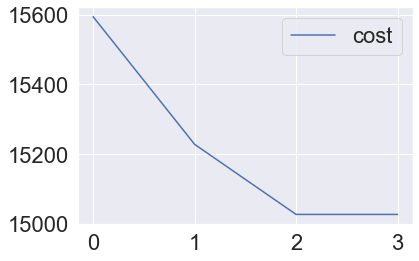

In [598]:
cost.plot.line()

In [599]:
from scipy.sparse import csr_matrix

In [600]:
movie_features_df_matrix = csr_matrix(df_down.values)
movie_features_df_matrix.shape

(2870, 1414)

In [601]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute',radius = 1.5)
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', radius=1.5)

In [602]:
df = pd.read_excel('Data2.xlsx')

In [603]:
sectors=df.iloc[:,1:3]
query_index = np.random.choice(df_down.shape[0])
print(sectors.loc[query_index]['Name'])
print(sectors.loc[query_index]['Type'])

 905.  Fitbay 
 E-Commerce, Fashion, Private Social Networking


In [604]:
distances, indices = model_knn.kneighbors(df_down.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 4)

In [605]:
distances = distances[0][1:6]

In [606]:
indices = indices[0][1:6]

In [607]:
print(distances,indices)

[0.2429667  0.27777778 0.31483984] [2862 2818 2192]


In [608]:
print('Prediction for : ',sectors.loc[query_index]['Name'])
print('Sector :',sectors.loc[query_index]['Type'])
print('---------------------------------------------')
print('---------------------------------------------')
for i in indices:
    print('Company it could participate with is : ')
    print('{0} :'.format(sectors.iloc[i]['Name']))
    print('Sector :{0}'.format(sectors.iloc[i]['Type']))
    print('---------------------------------------------')

Prediction for :   905.  Fitbay 
Sector :  E-Commerce, Fashion, Private Social Networking
---------------------------------------------
---------------------------------------------
Company it could participate with is : 
 613.  James and James Fulfilment  :
Sector : E-Commerce, Outsourcing
---------------------------------------------
Company it could participate with is : 
 569.  CARIUMA  :
Sector : E-Commerce, Fashion, Shoes
---------------------------------------------
Company it could participate with is : 
 893.  Wabi  :
Sector : E-Commerce, Food and Beverage, Grocery
---------------------------------------------
